In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Handle missing values for all columns
# df = df.interpolate(method='time').dropna()

# Plot all time series

# Statistical tests and decomposition for each column

# Rolling means and correlation matrix

# Correlation matrix

# Lag plots for all columns

# ACF and PACF plots for all columns


In [19]:
# Load the dataset
# Assuming the dataset contains multiple time-series columns indexed by date
df = pd.read_csv("datasets\energydata_complete.csv", index_col="date", parse_dates=True)
# Basic exploration
print(df.head())
print(df.info())
print(df.describe())

                     Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

                        T3       RH_3         T4       RH_4  ...         T9  \
date                                                         ...              
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667  ...  17.033333   
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500  ...  17.066667   
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000  ...  17.000000   
2016-01-11 17:30:00  19.79  45.000000  18.890000  45.72333

In [20]:
# for column in df.columns: print(df.columns[df.columns == column])
for column in df.columns: print(column, df.columns.get_loc(column))

Appliances 0
lights 1
T1 2
RH_1 3
T2 4
RH_2 5
T3 6
RH_3 7
T4 8
RH_4 9
T5 10
RH_5 11
T6 12
RH_6 13
T7 14
RH_7 15
T8 16
RH_8 17
T9 18
RH_9 19
T_out 20
Press_mm_hg 21
RH_out 22
Windspeed 23
Visibility 24
Tdewpoint 25
rv1 26
rv2 27


C:\Users\raedb\AppData\Local\Temp\ipykernel_16096\498834271.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(df.columns.get_loc(column)+1,figsize=(18, 18))


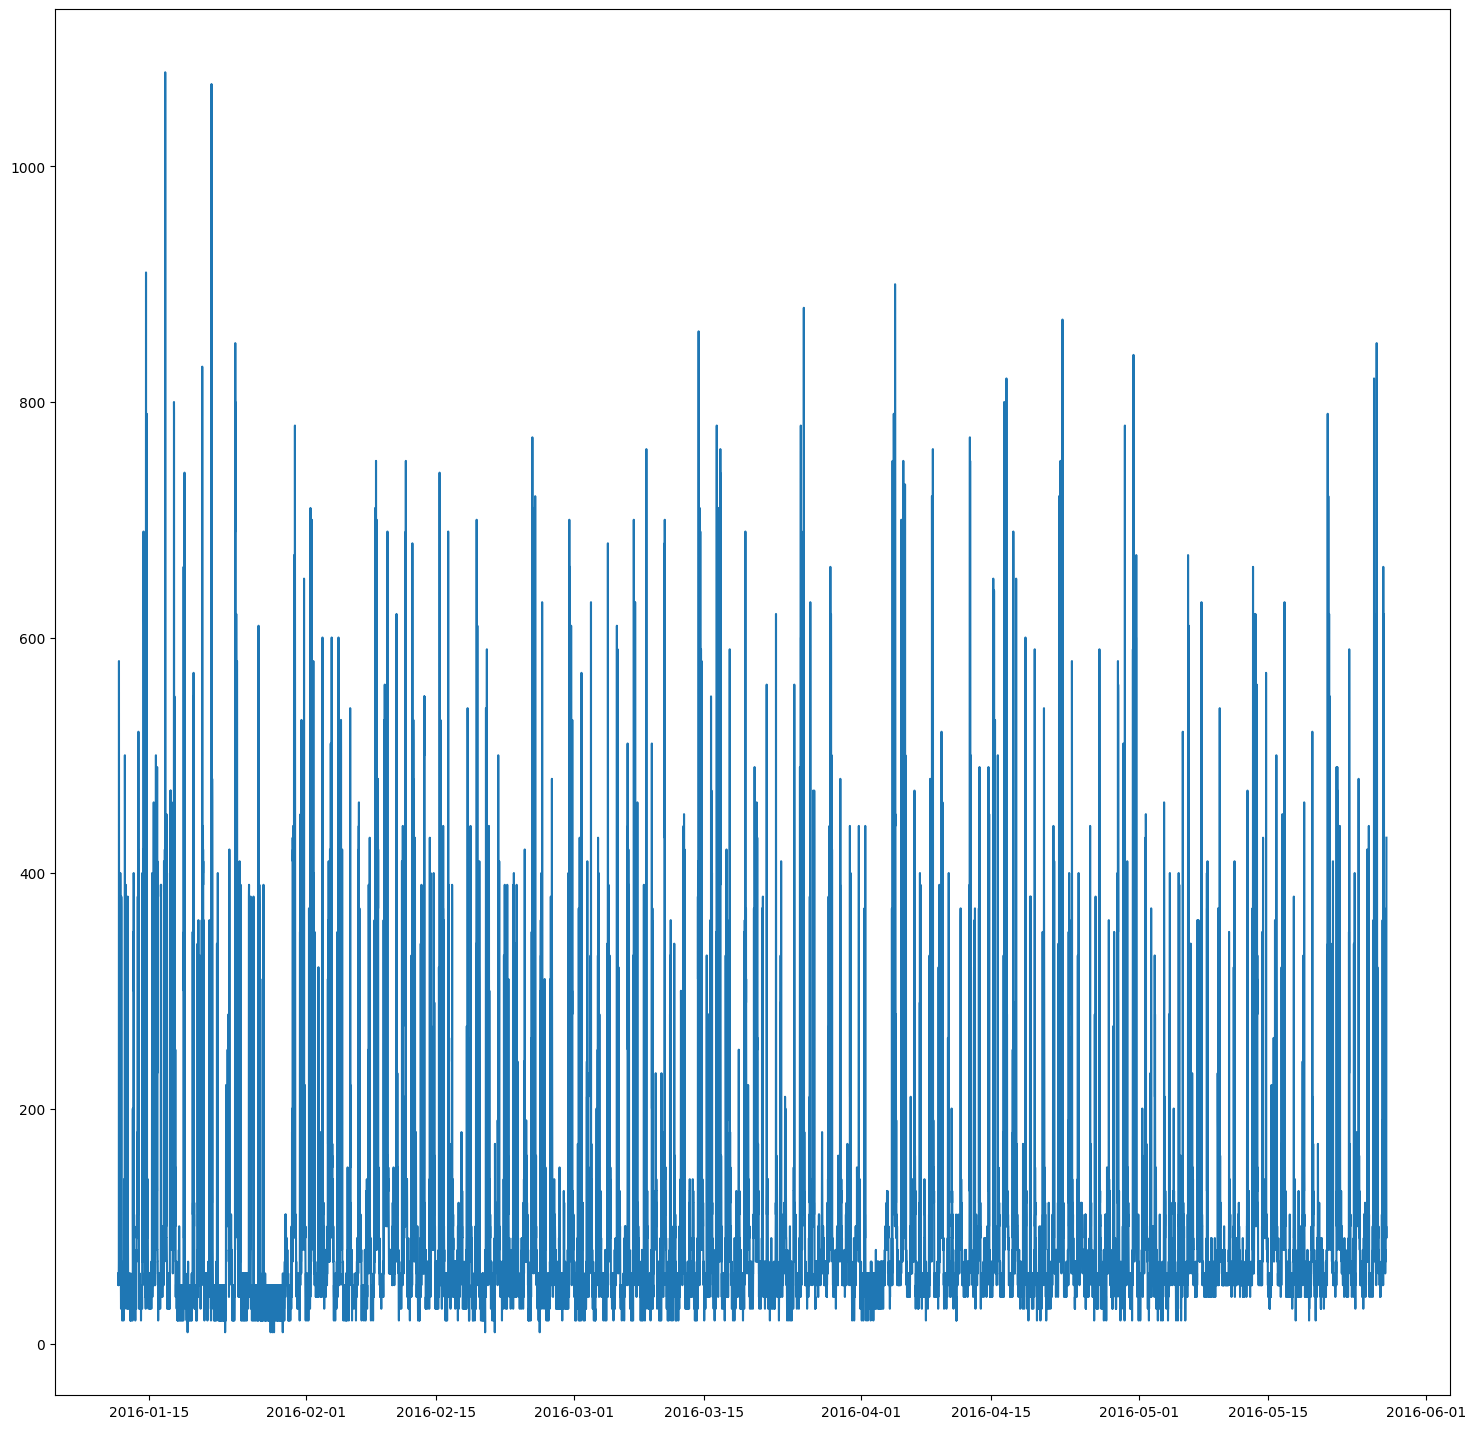

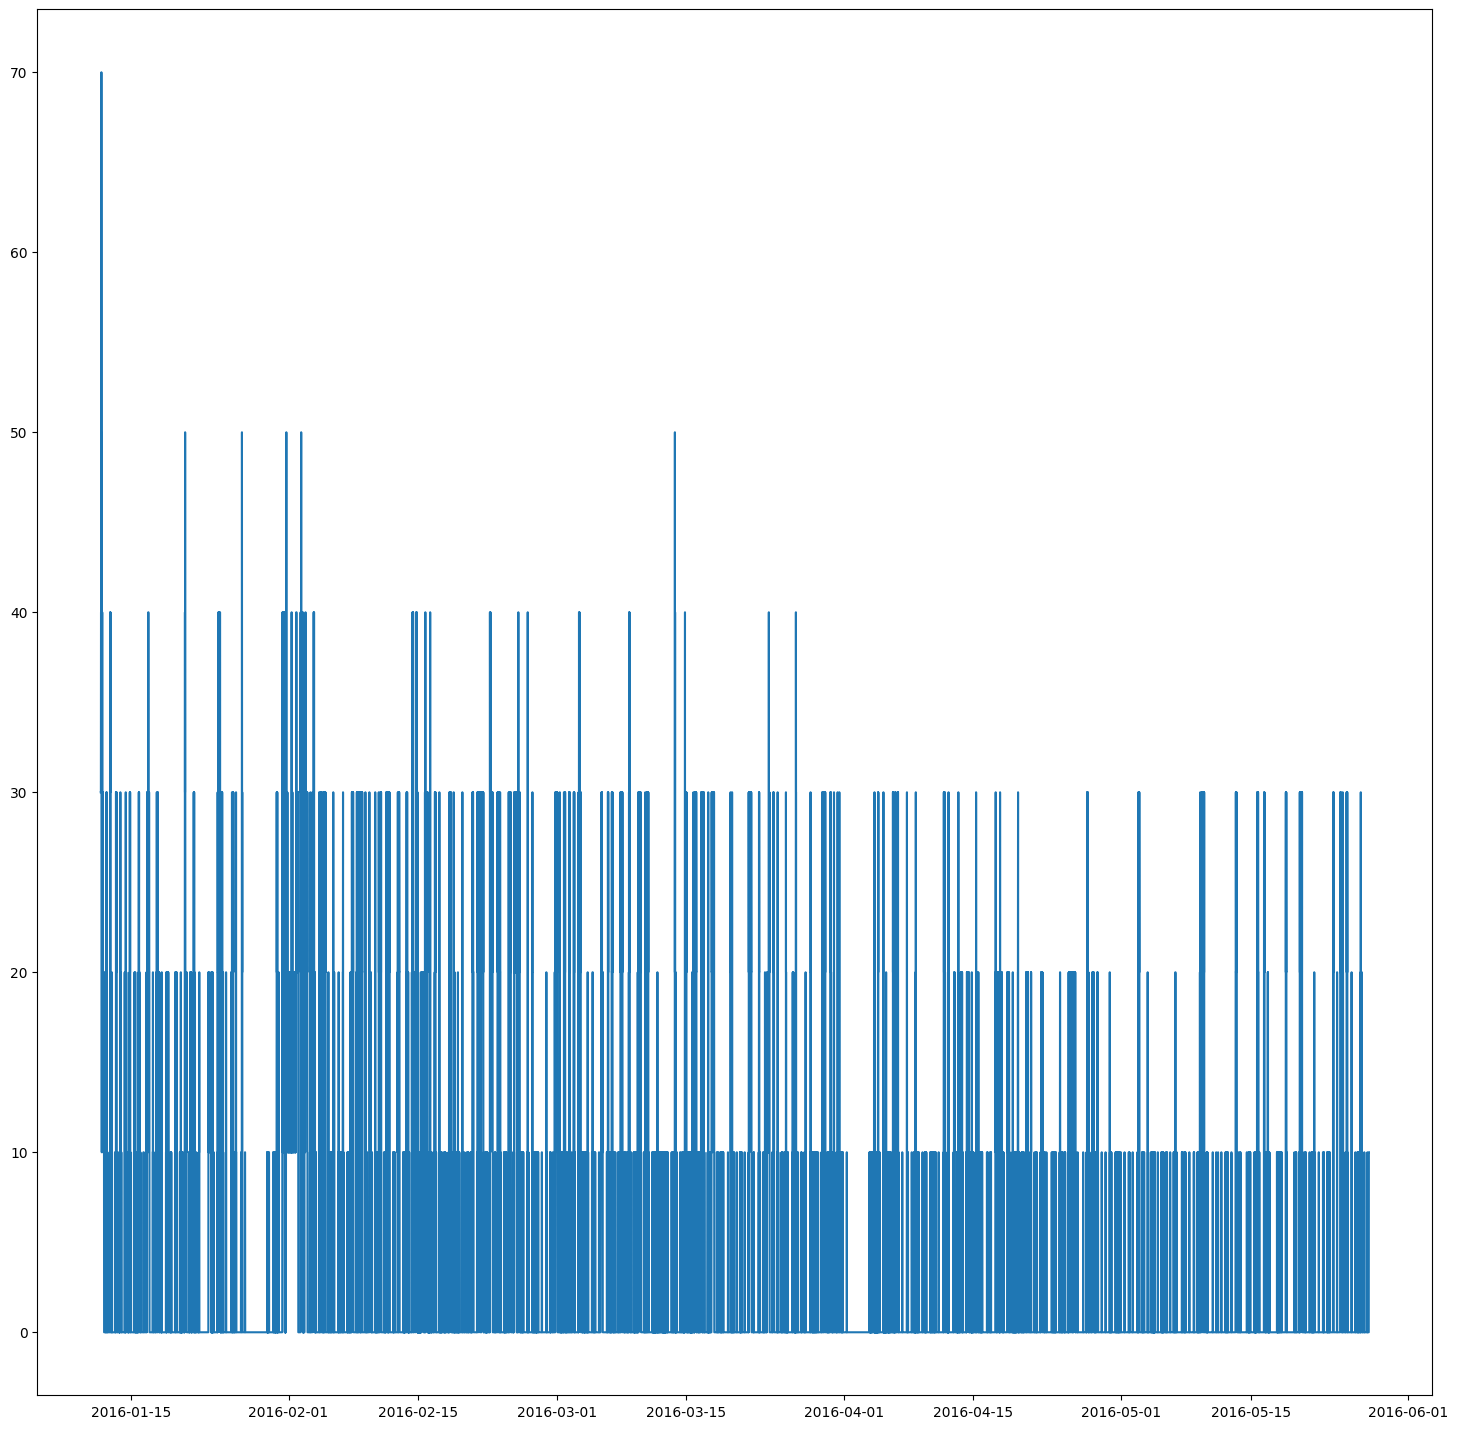

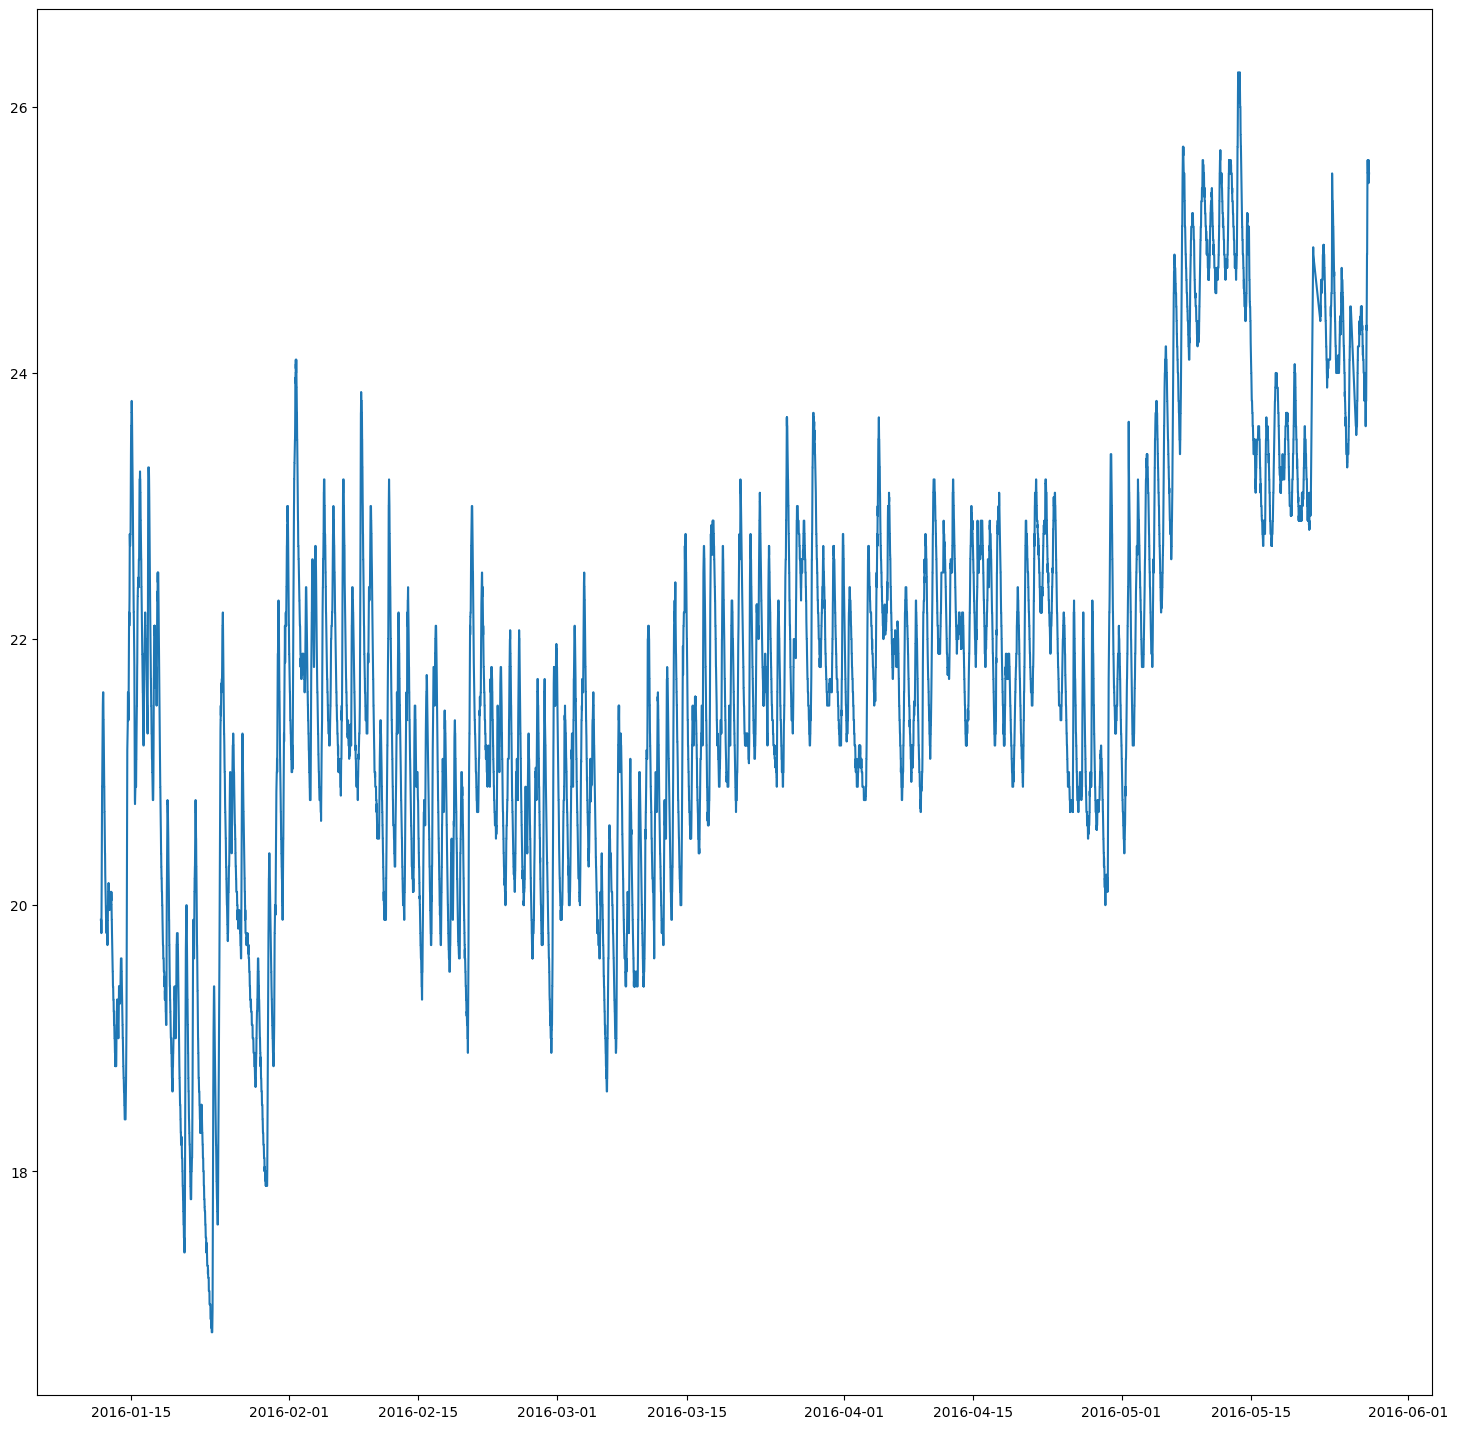

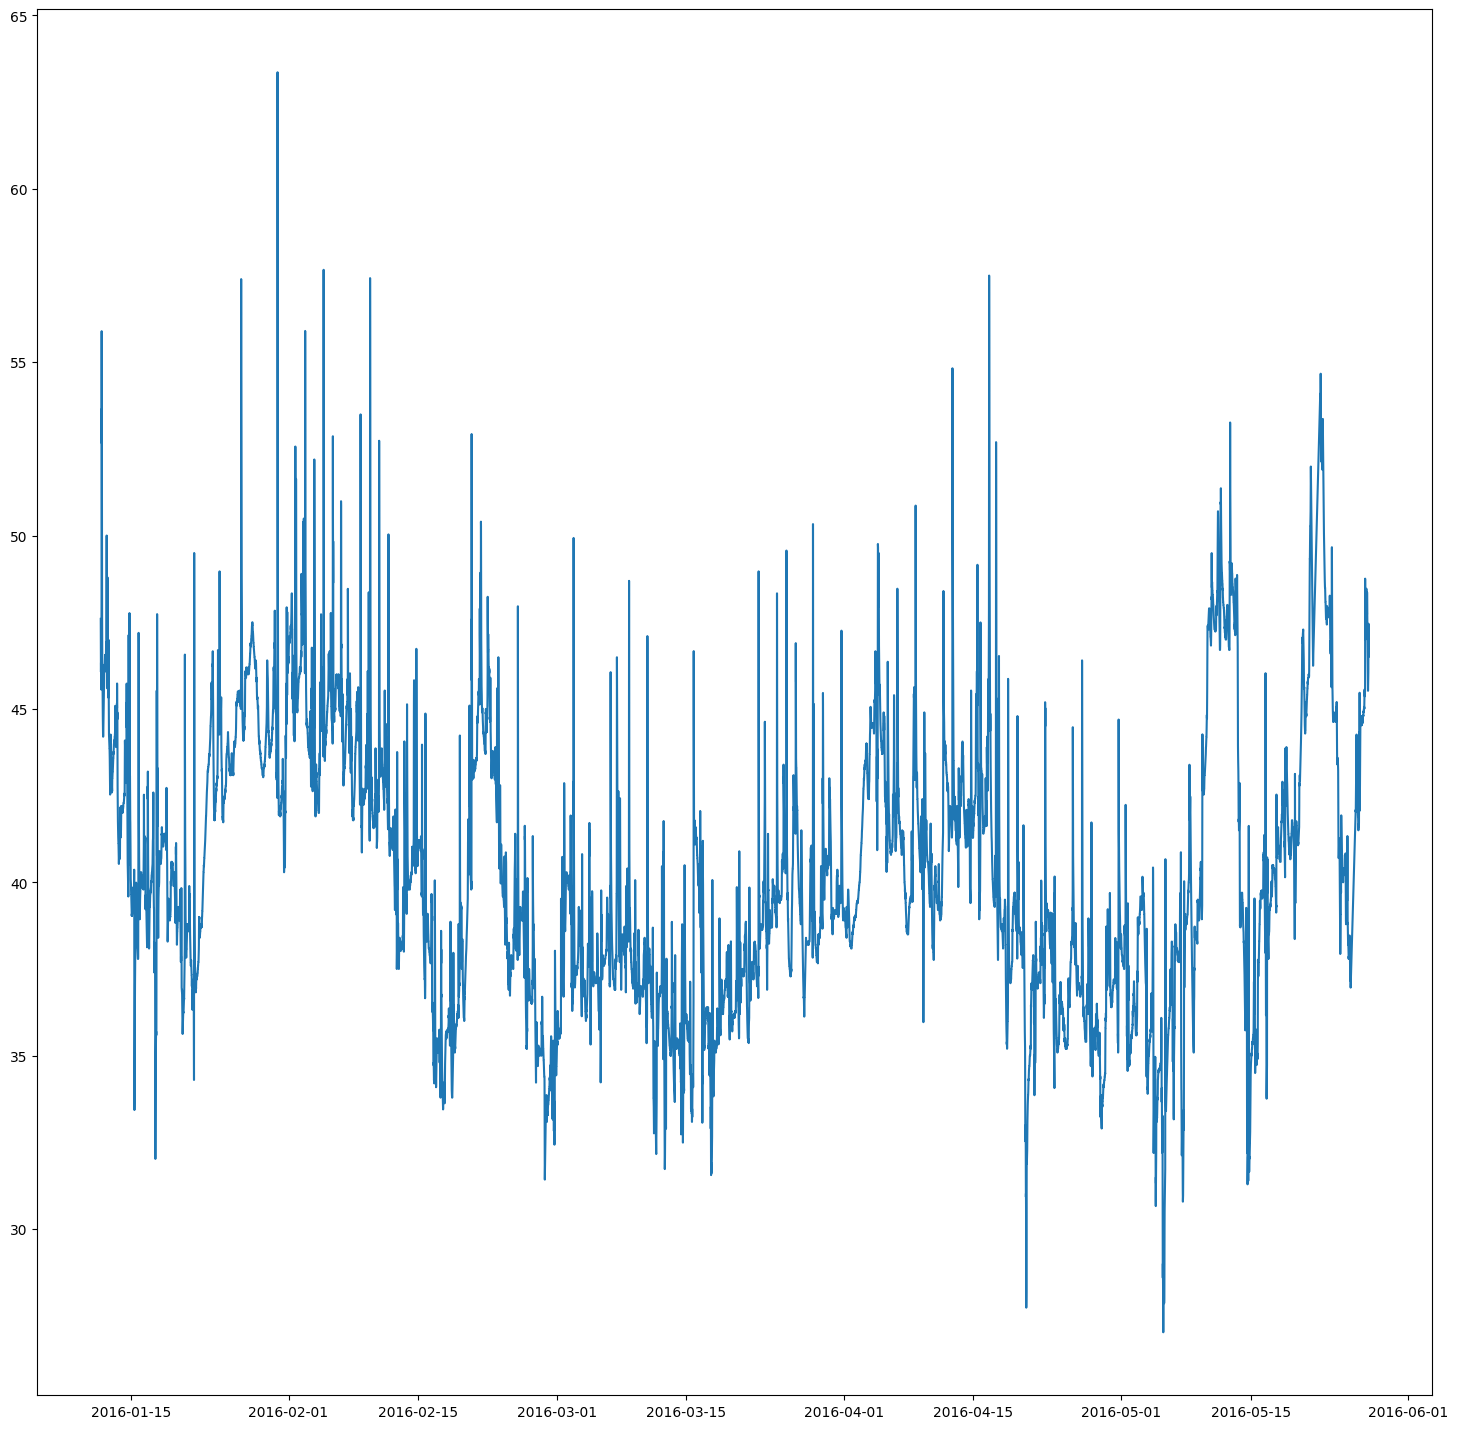

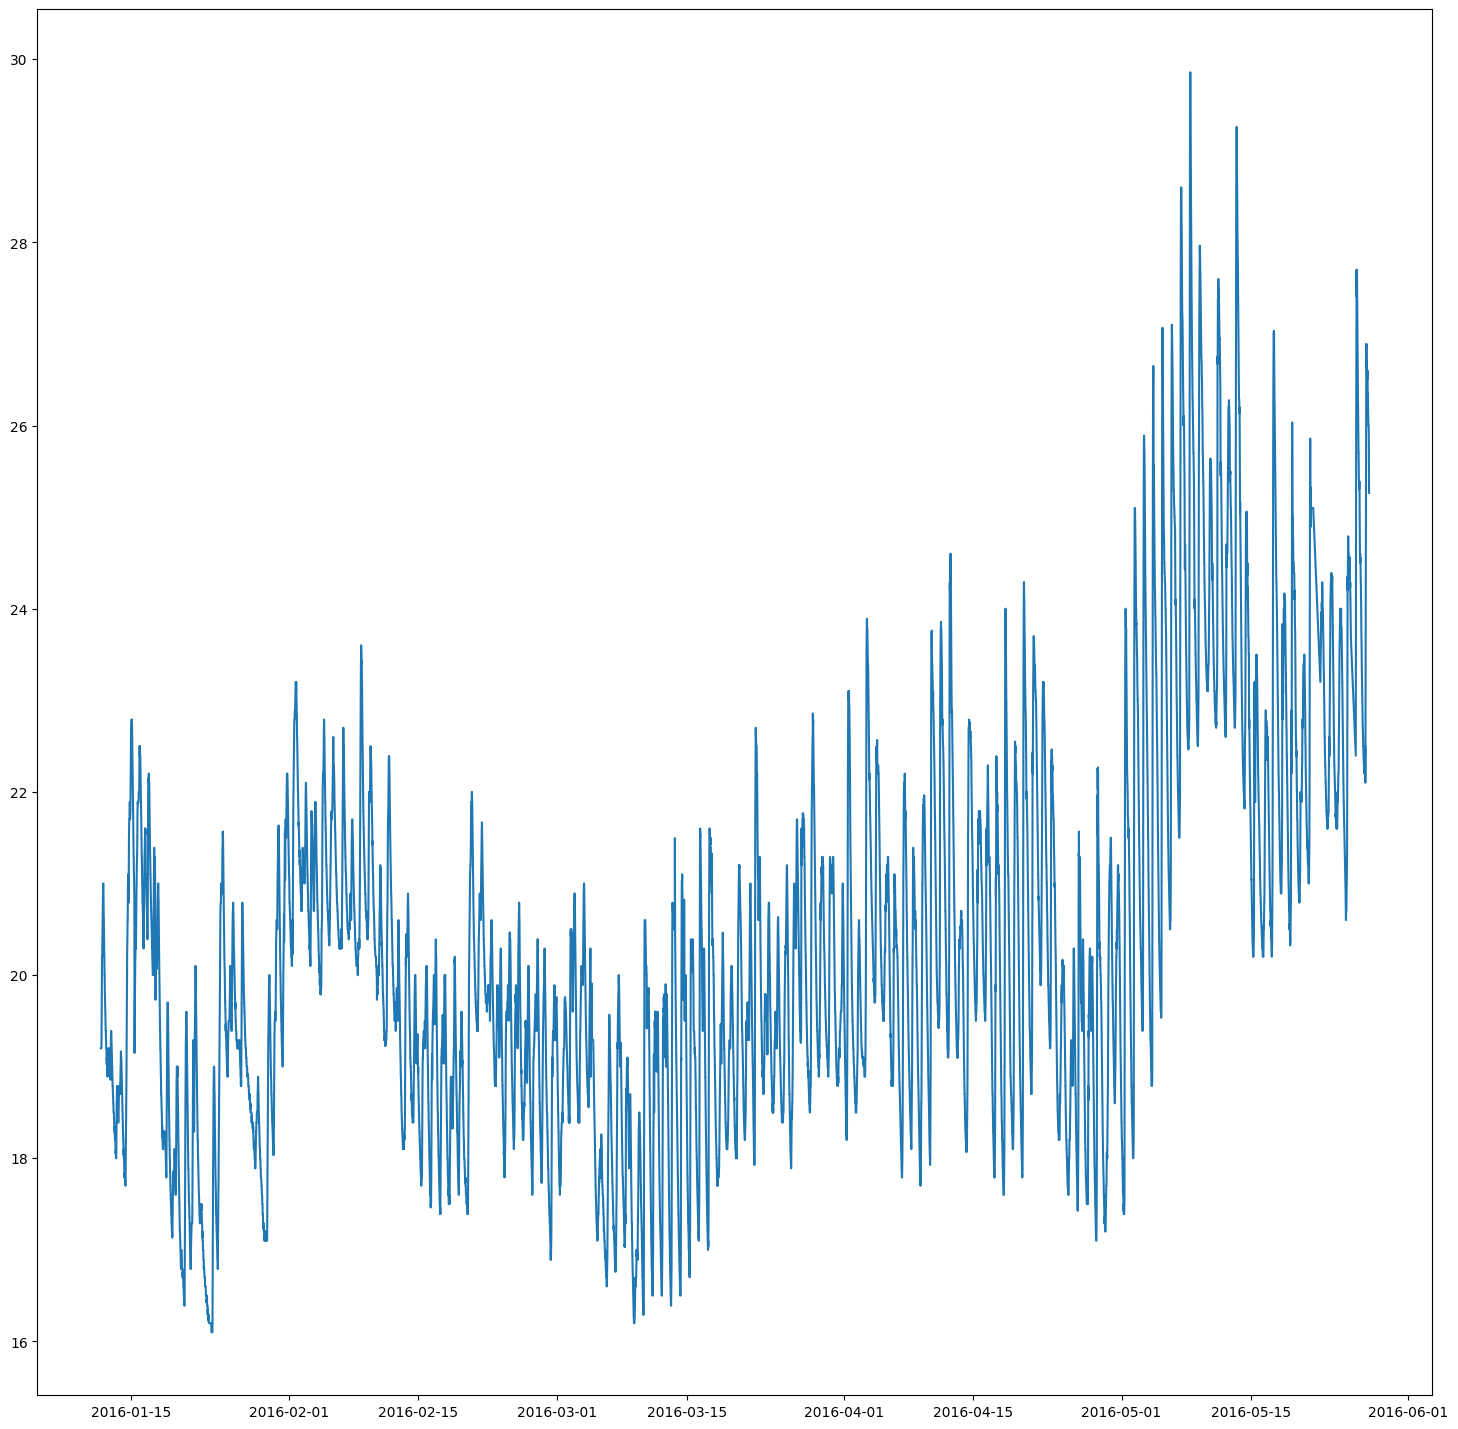

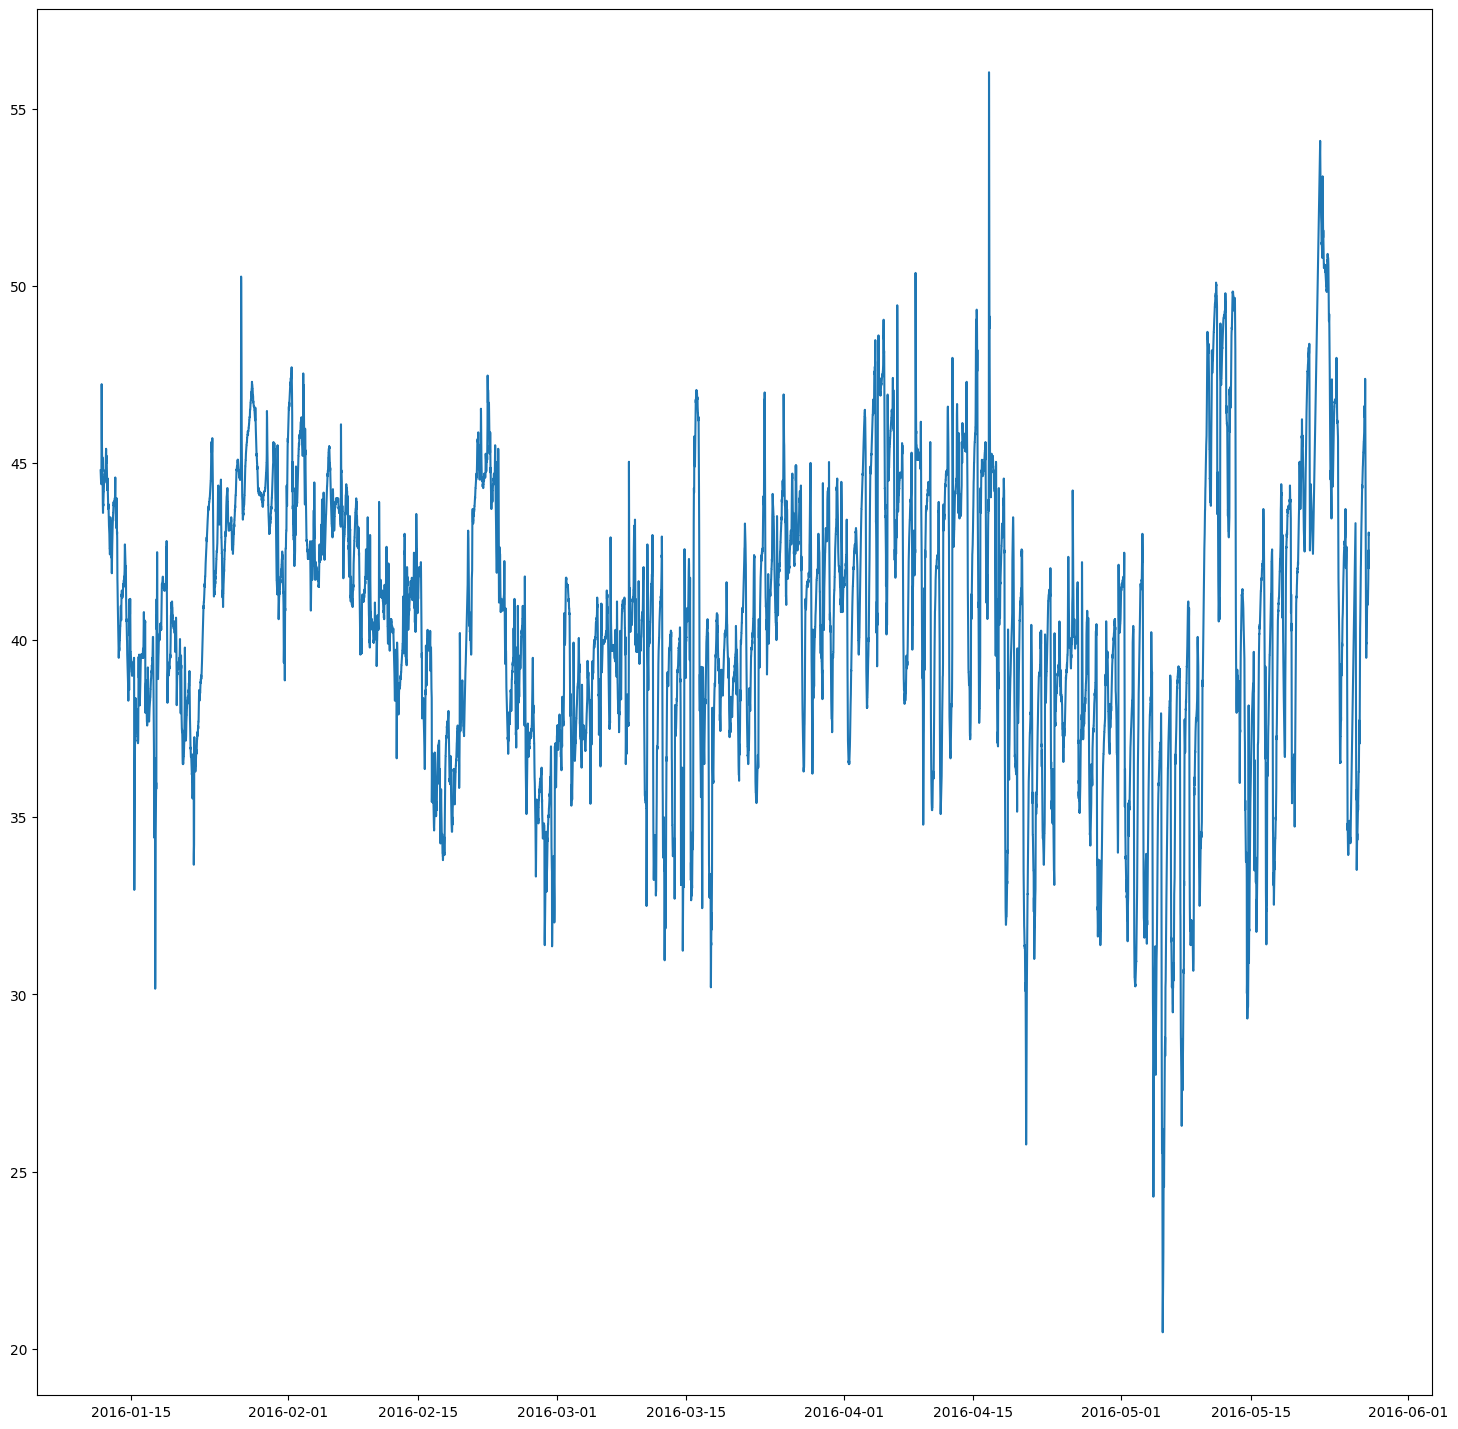

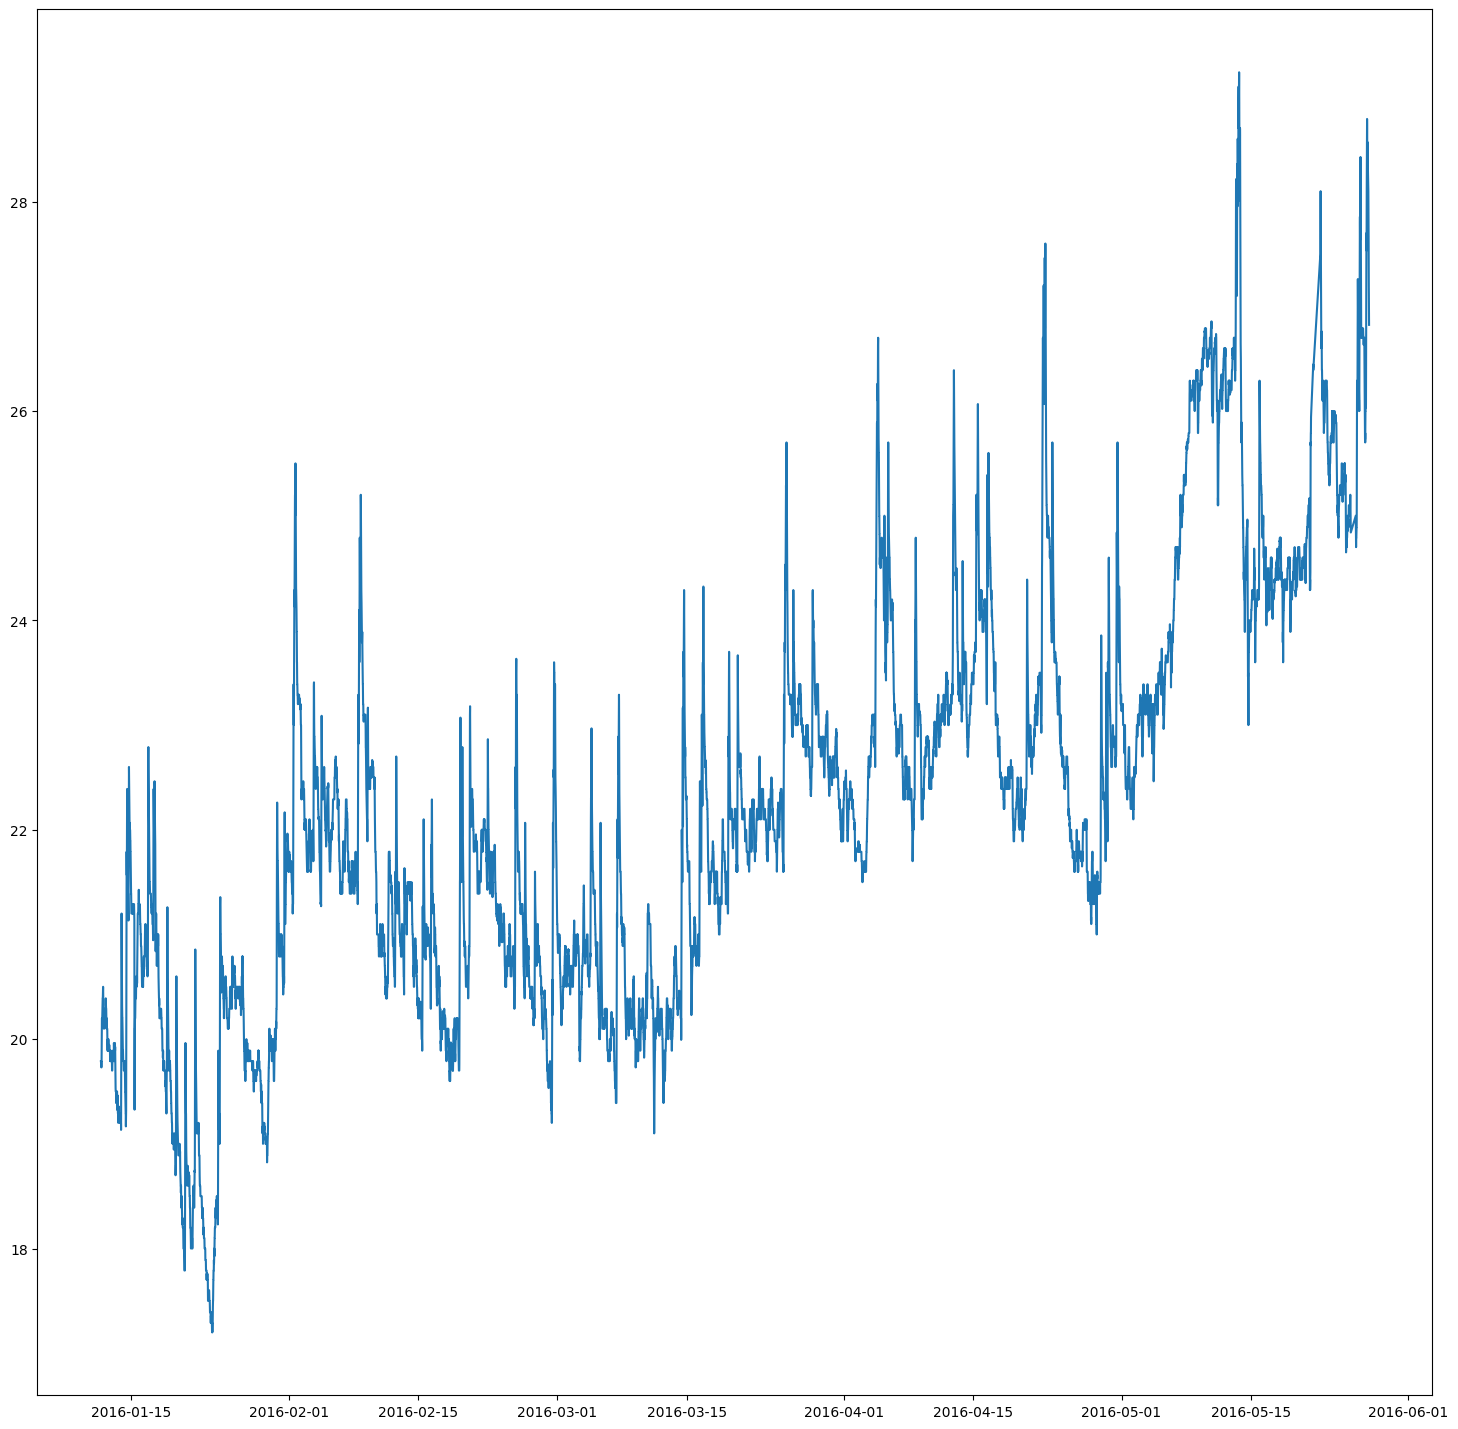

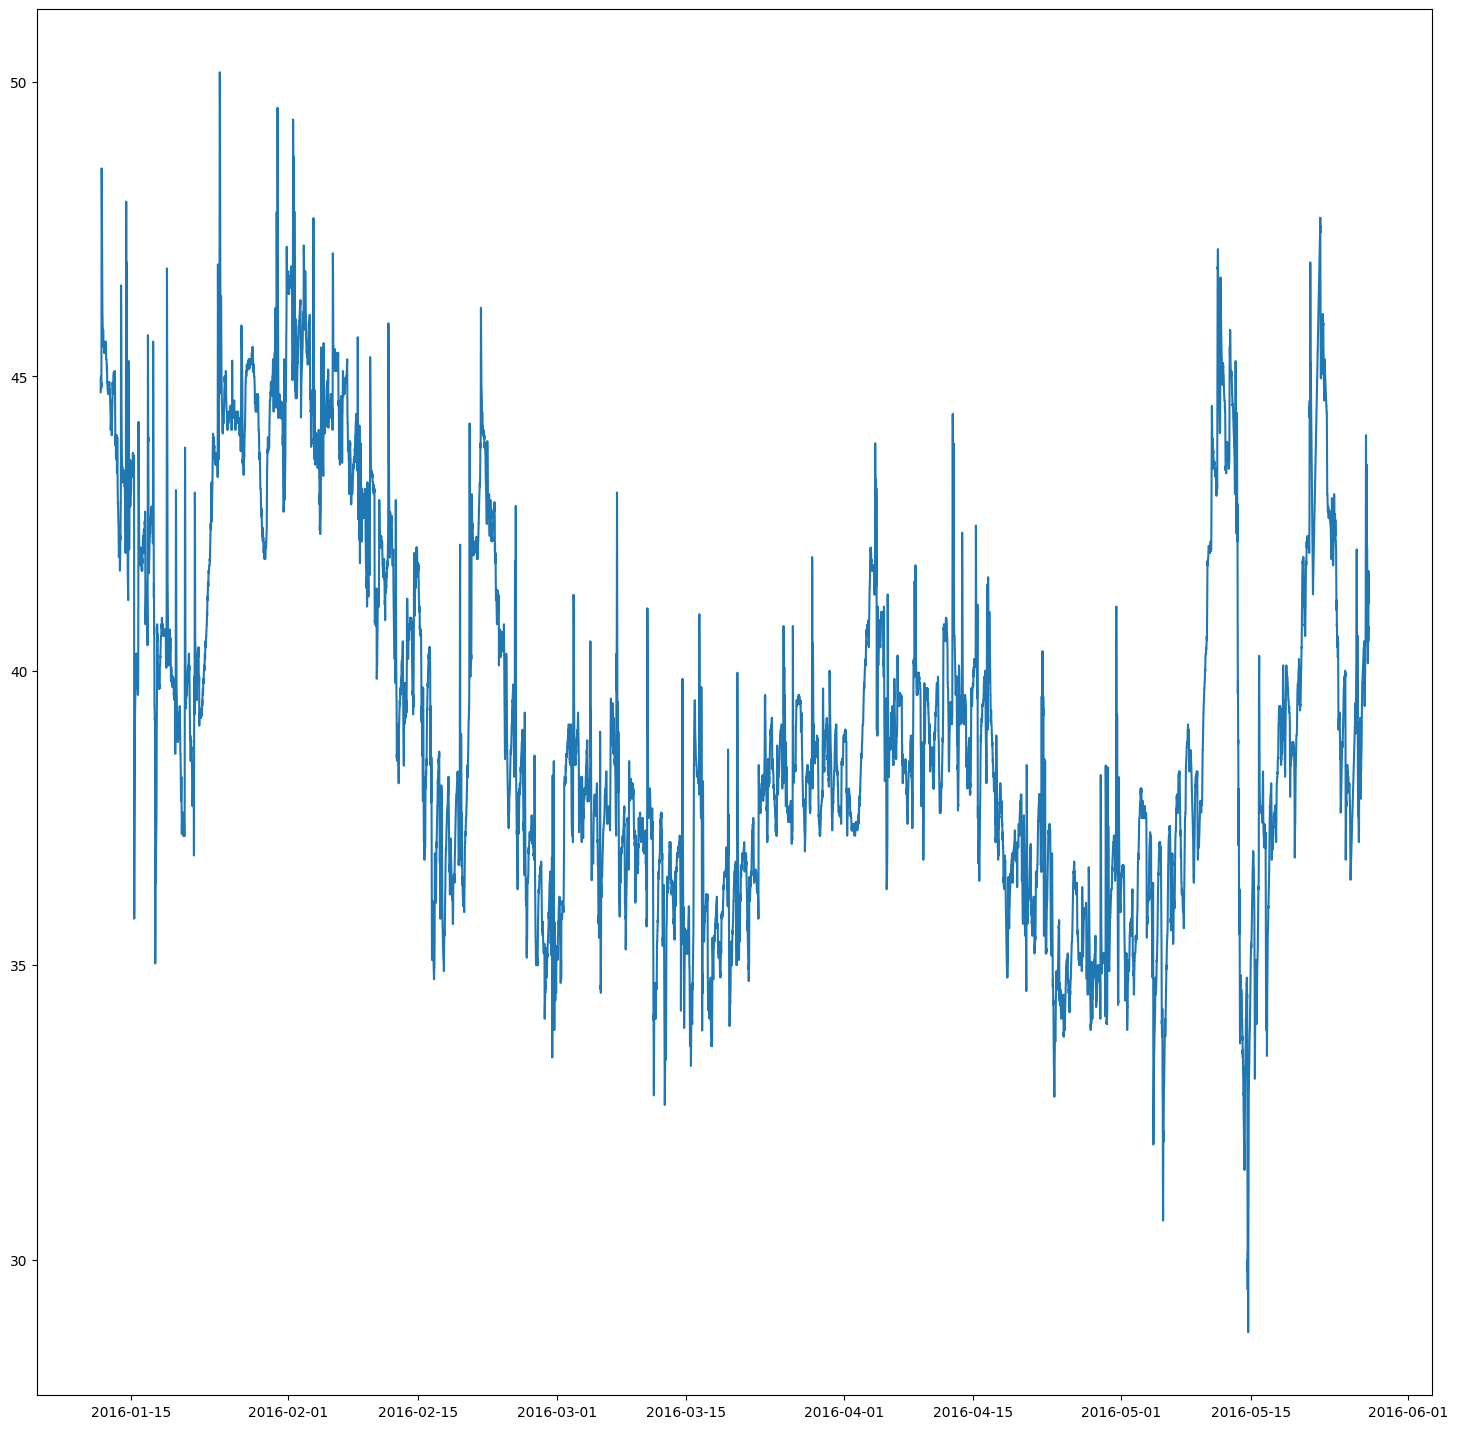

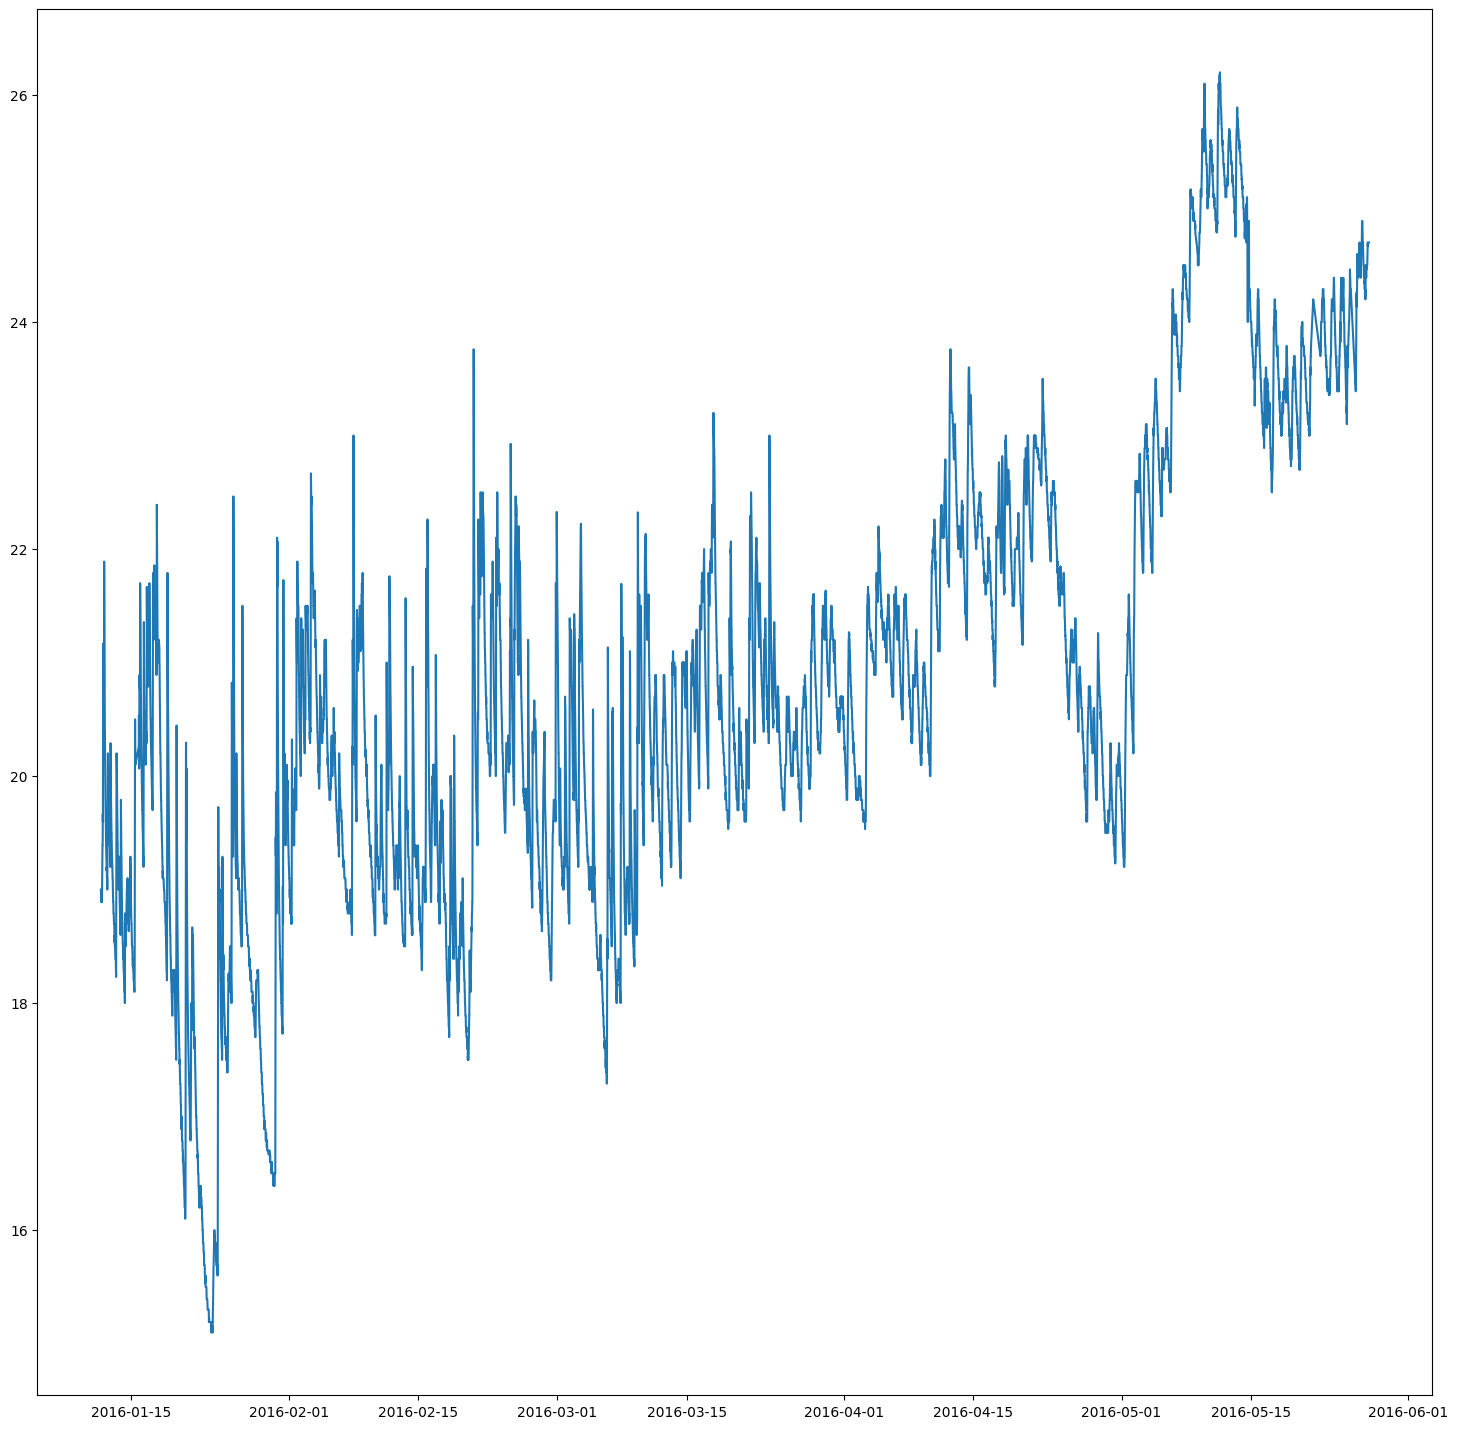

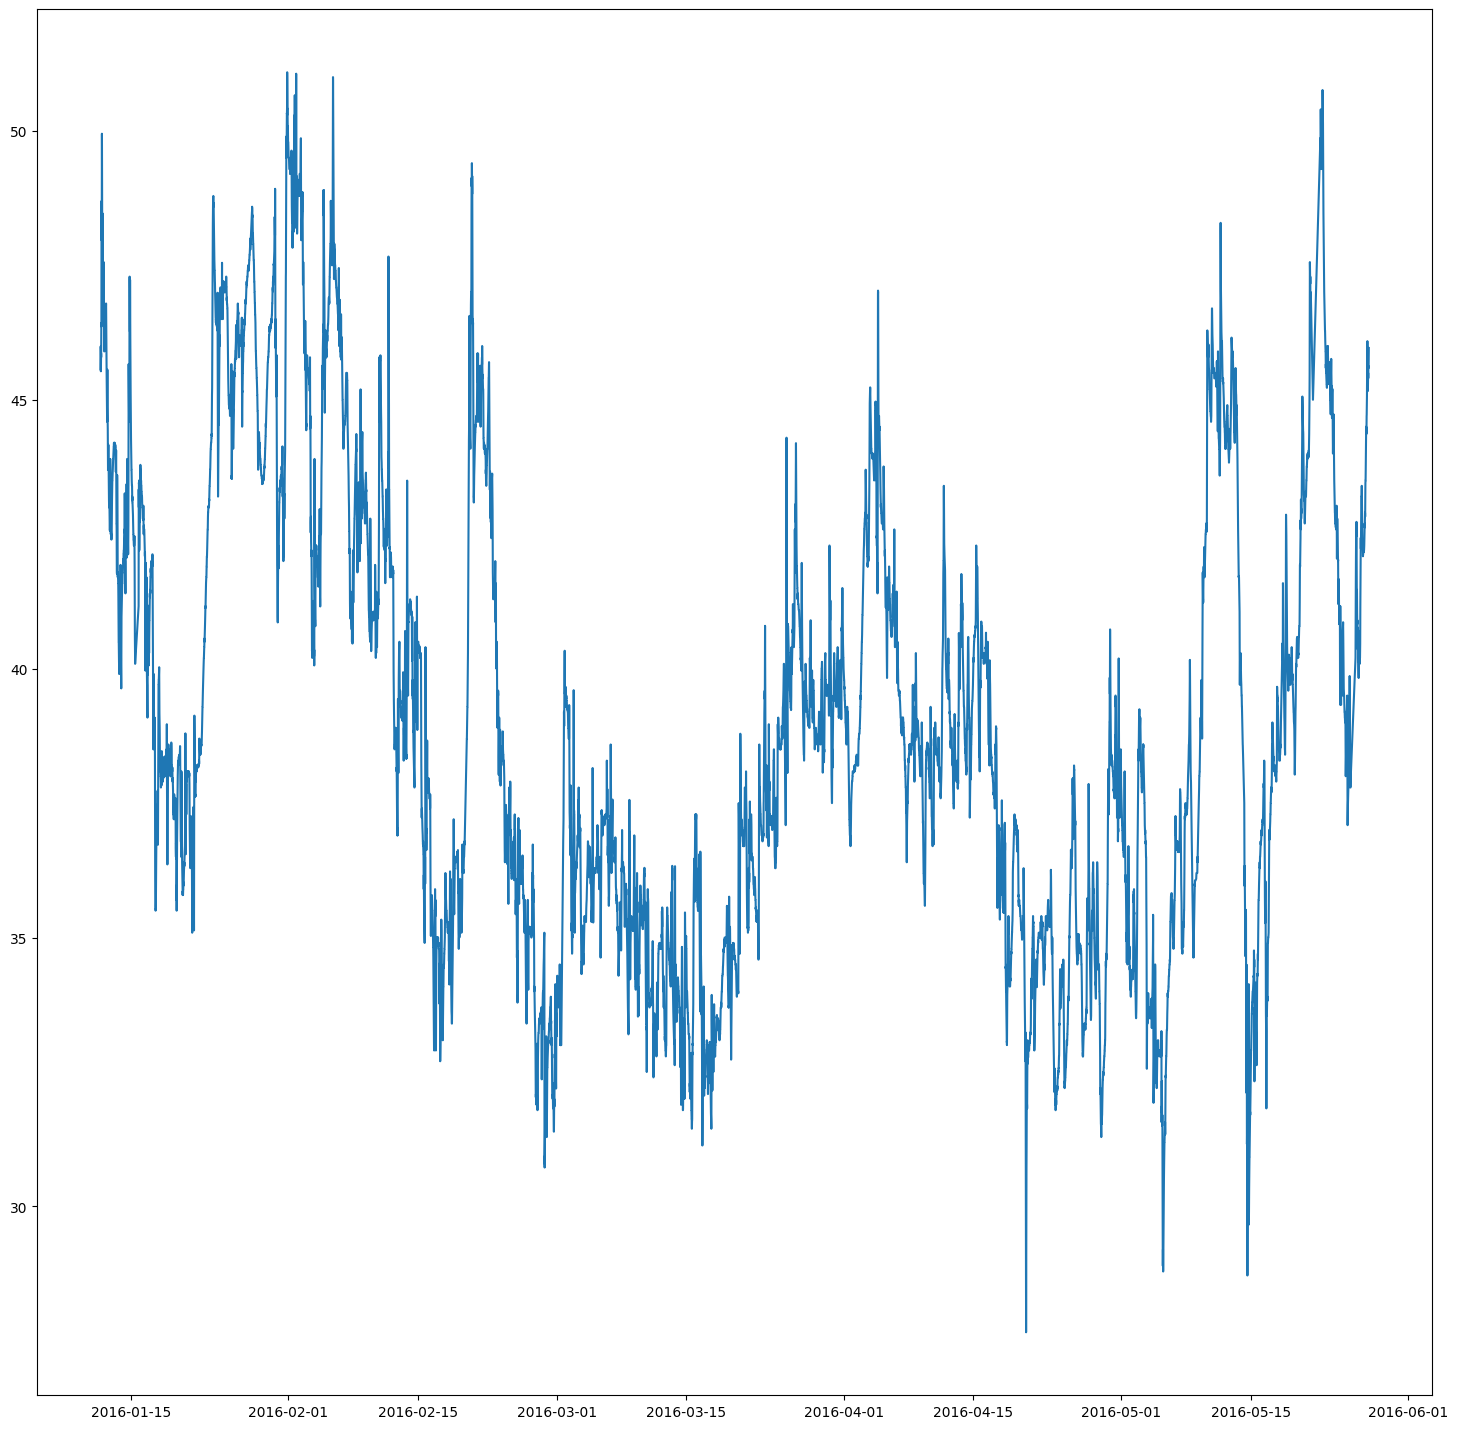

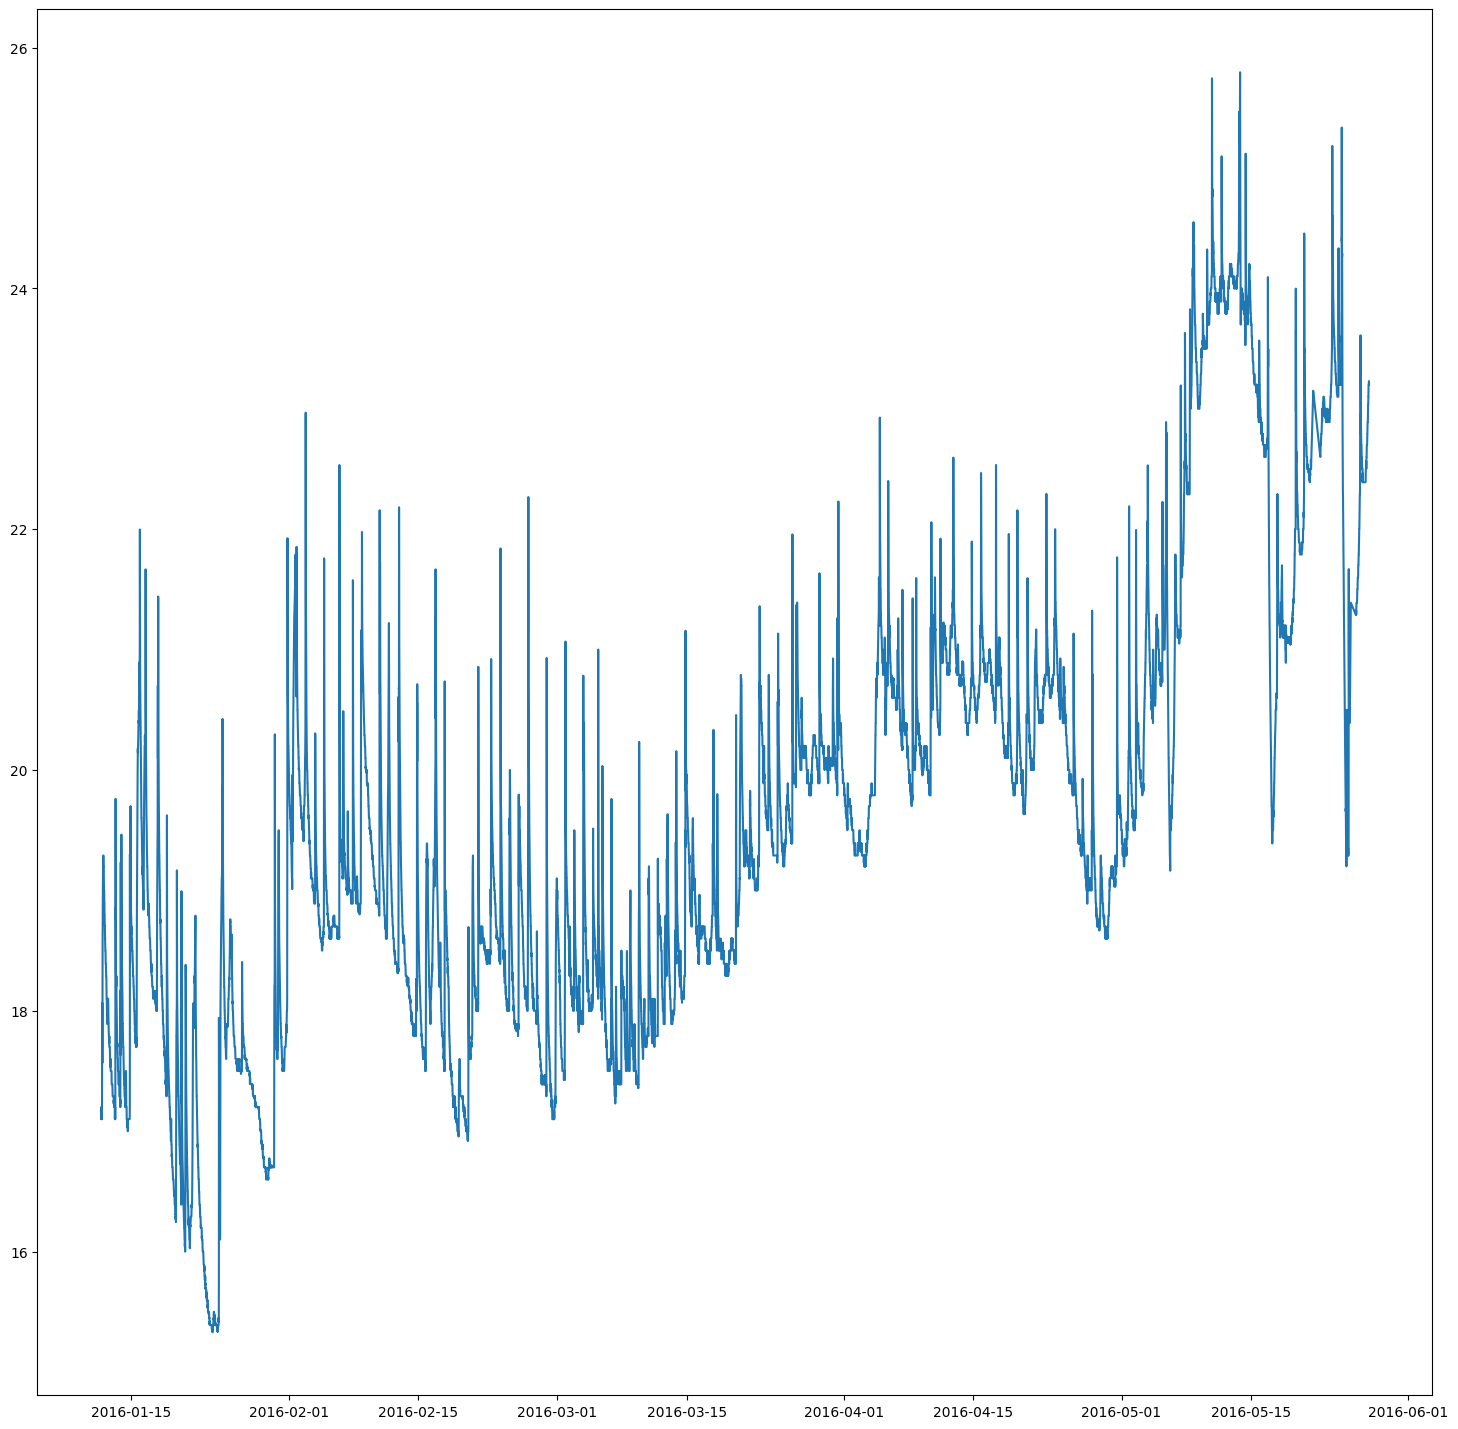

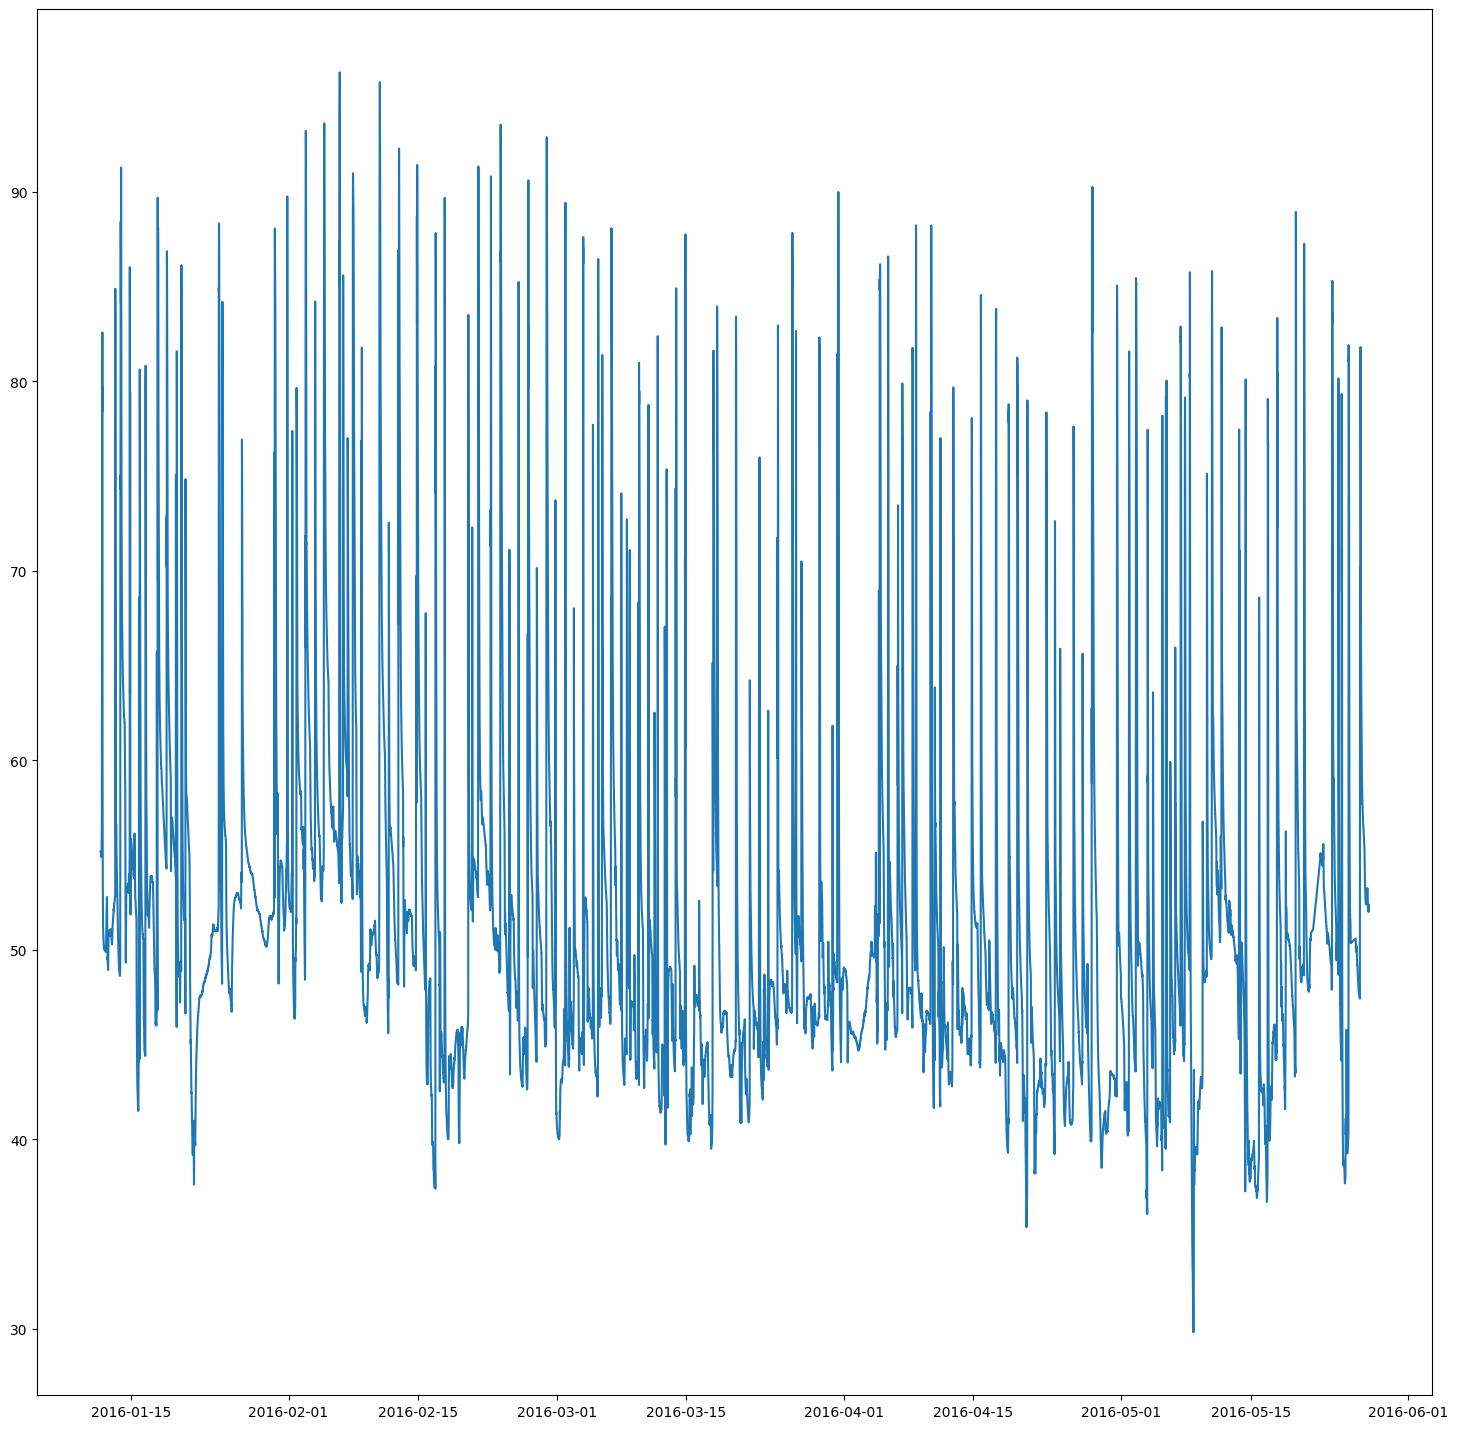

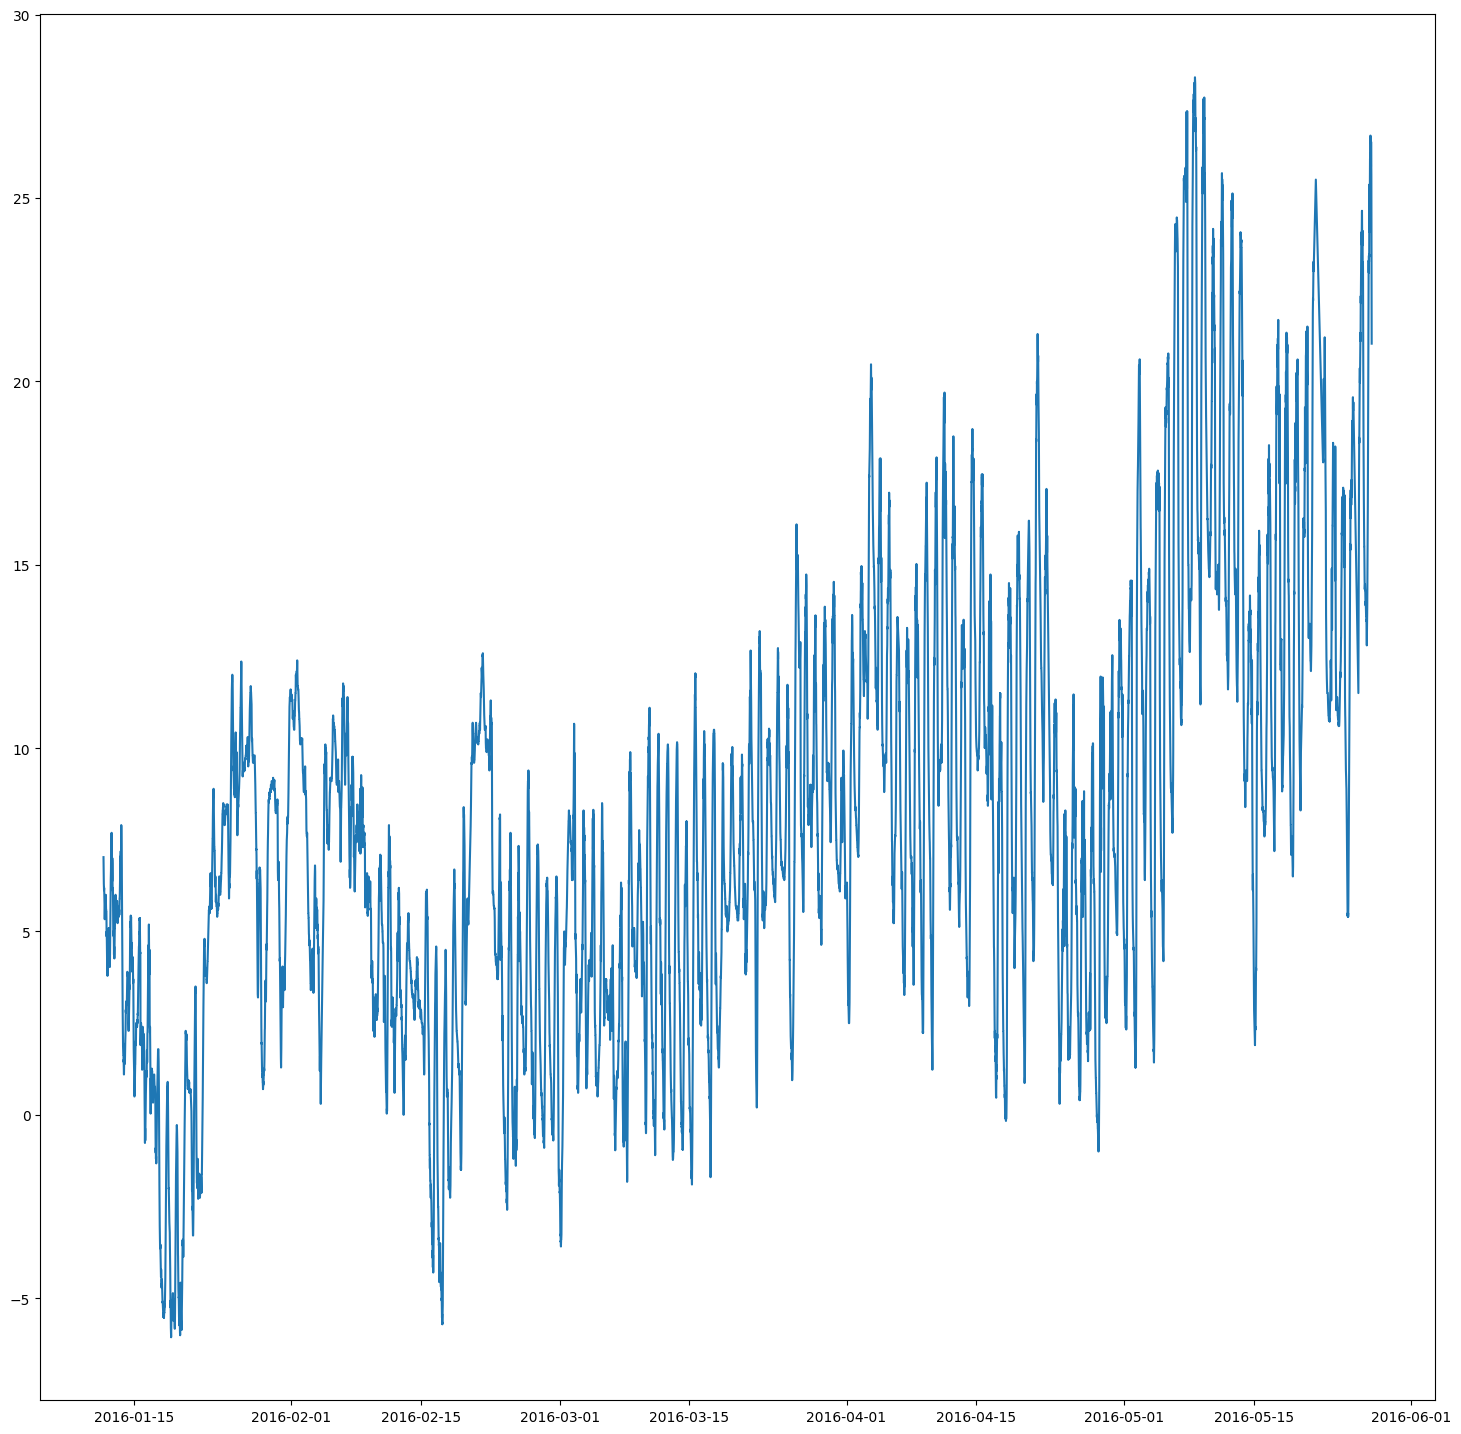

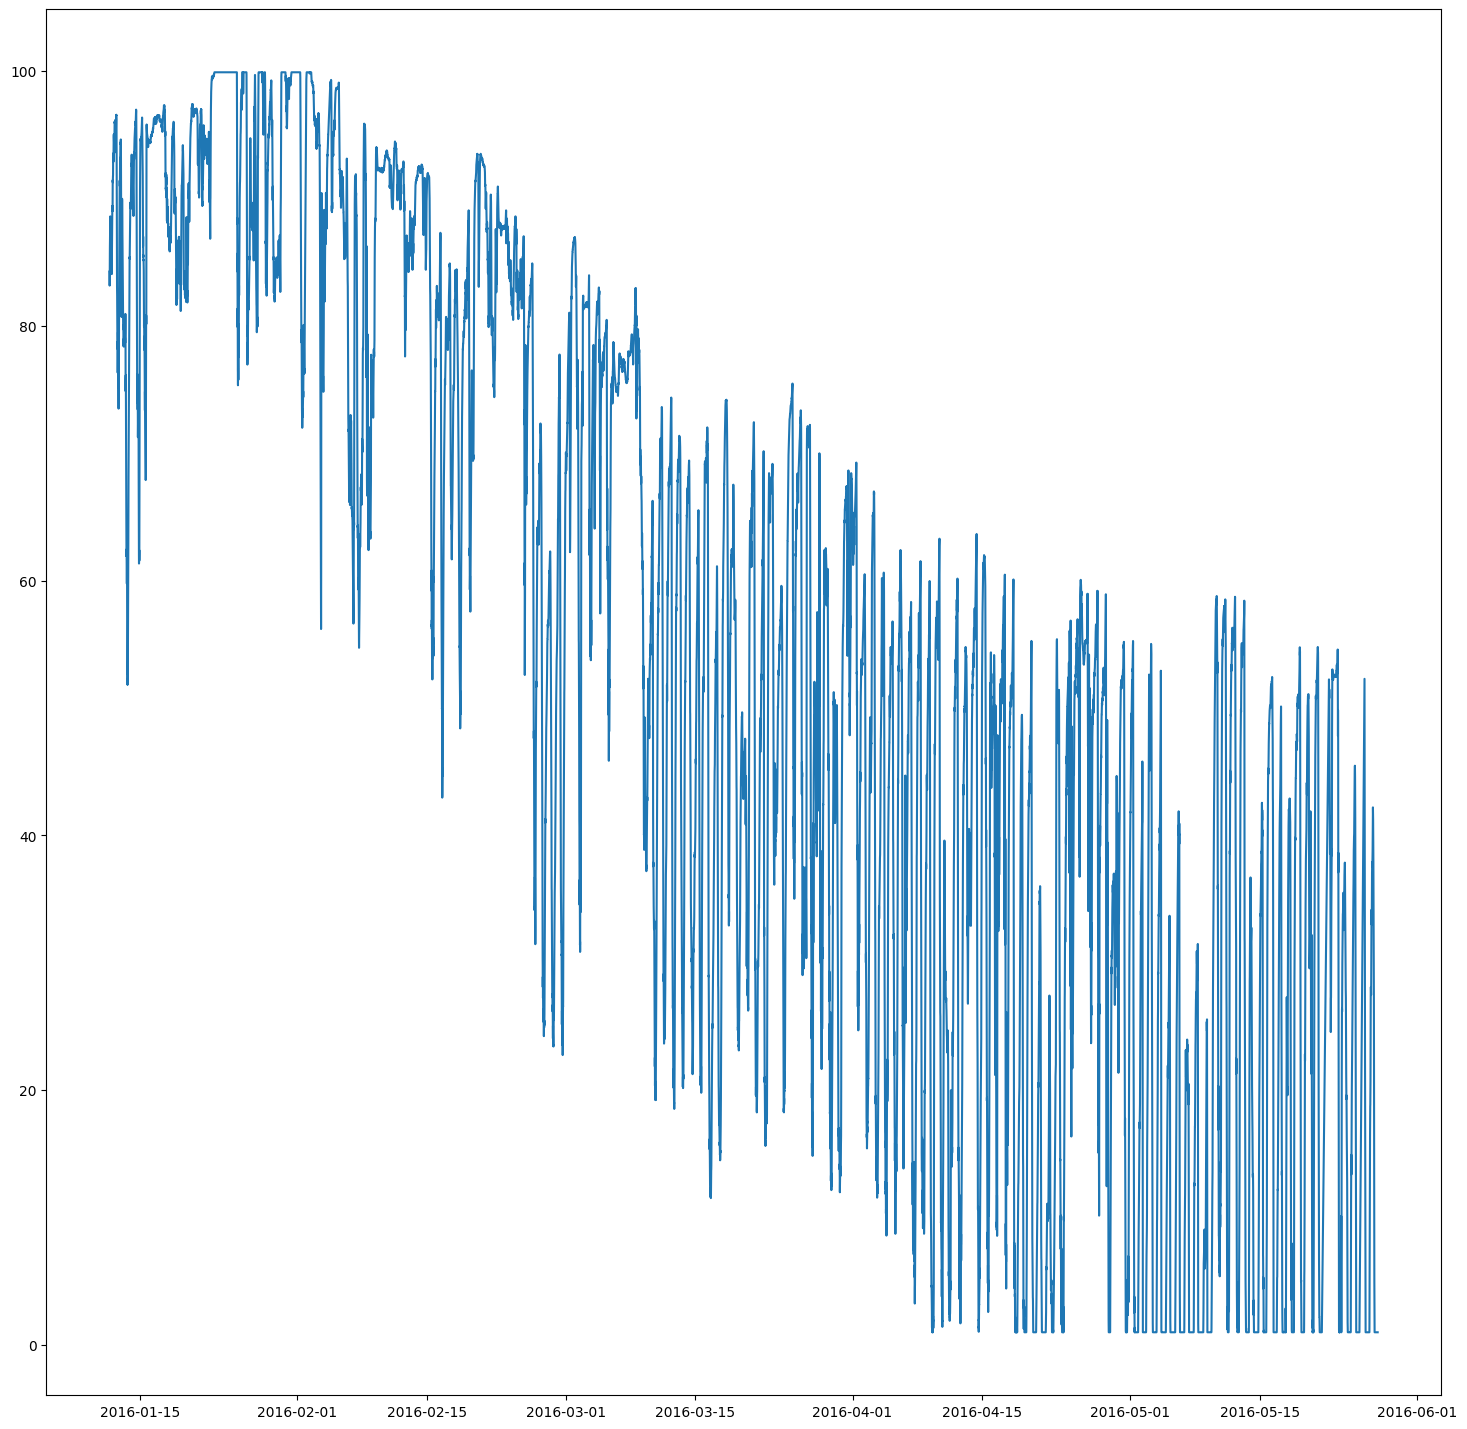

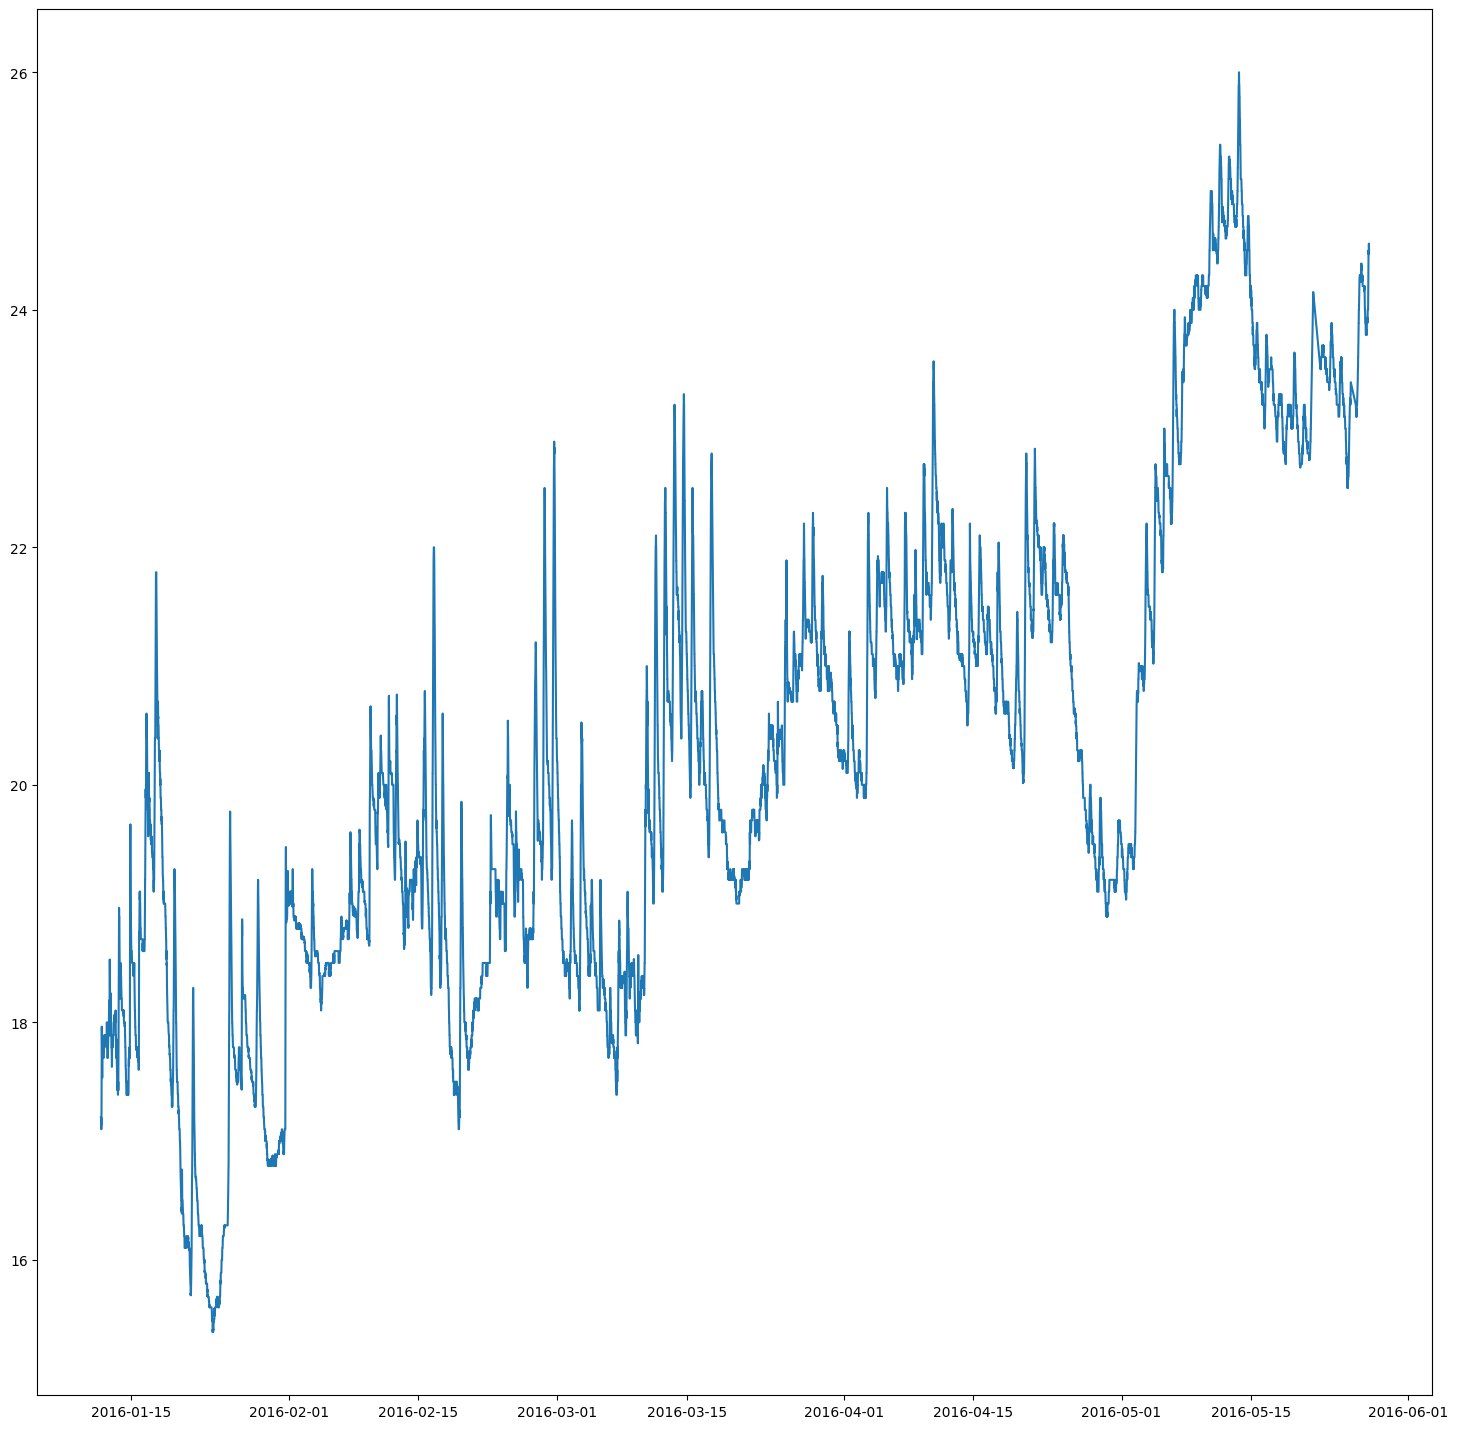

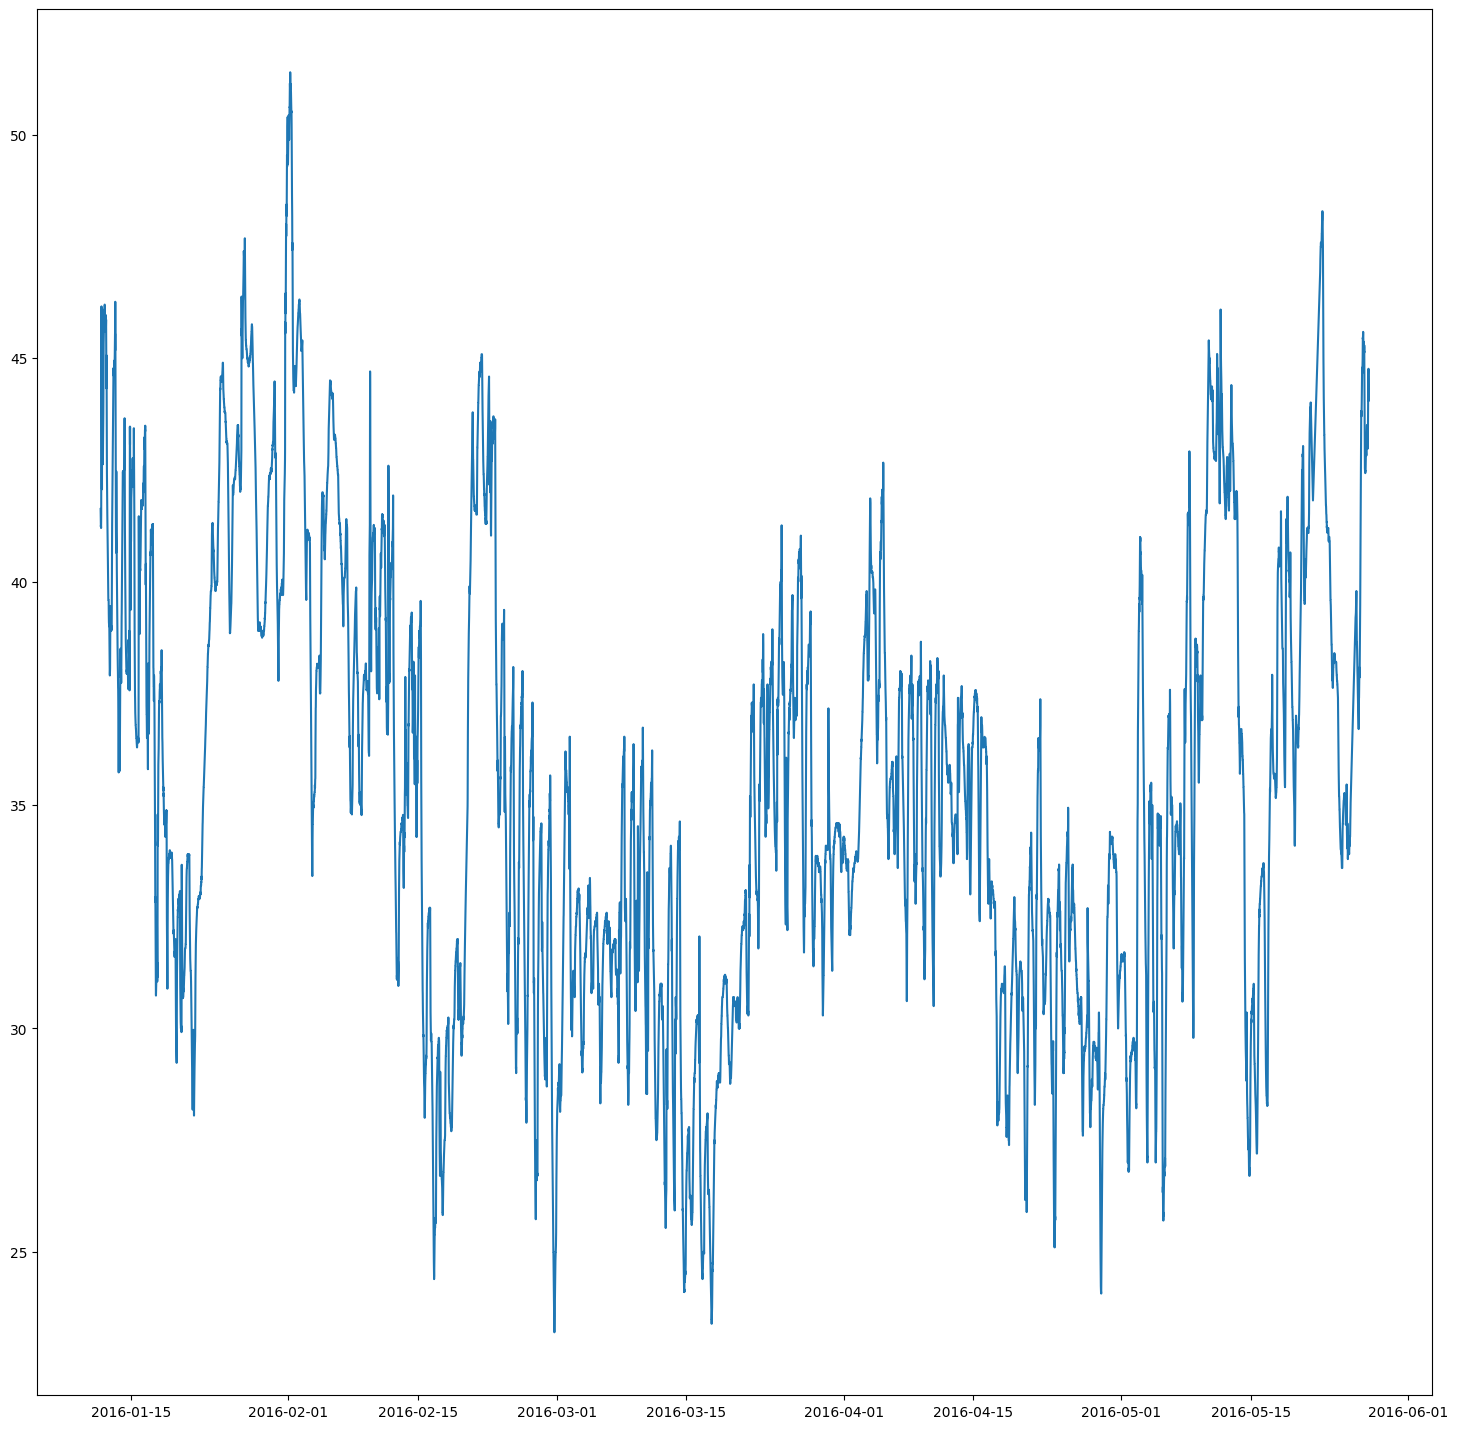

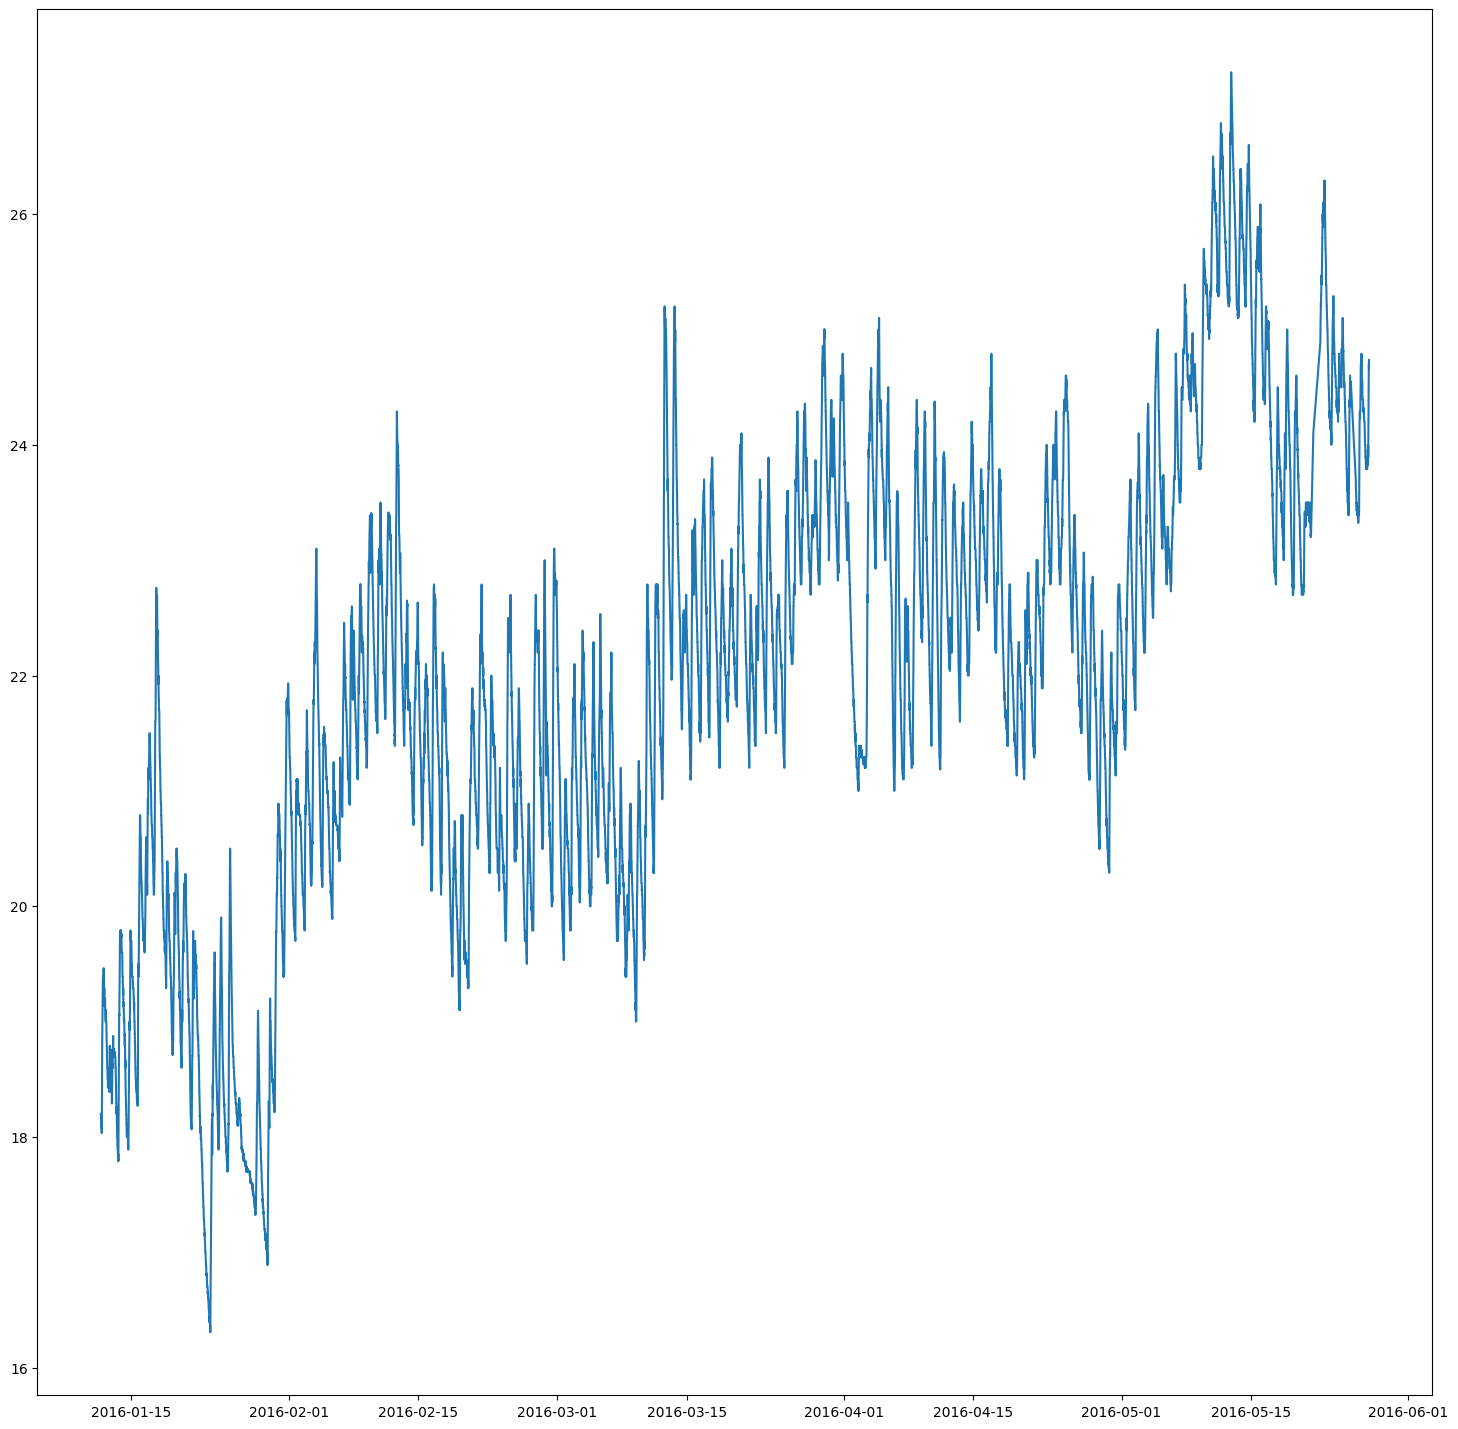

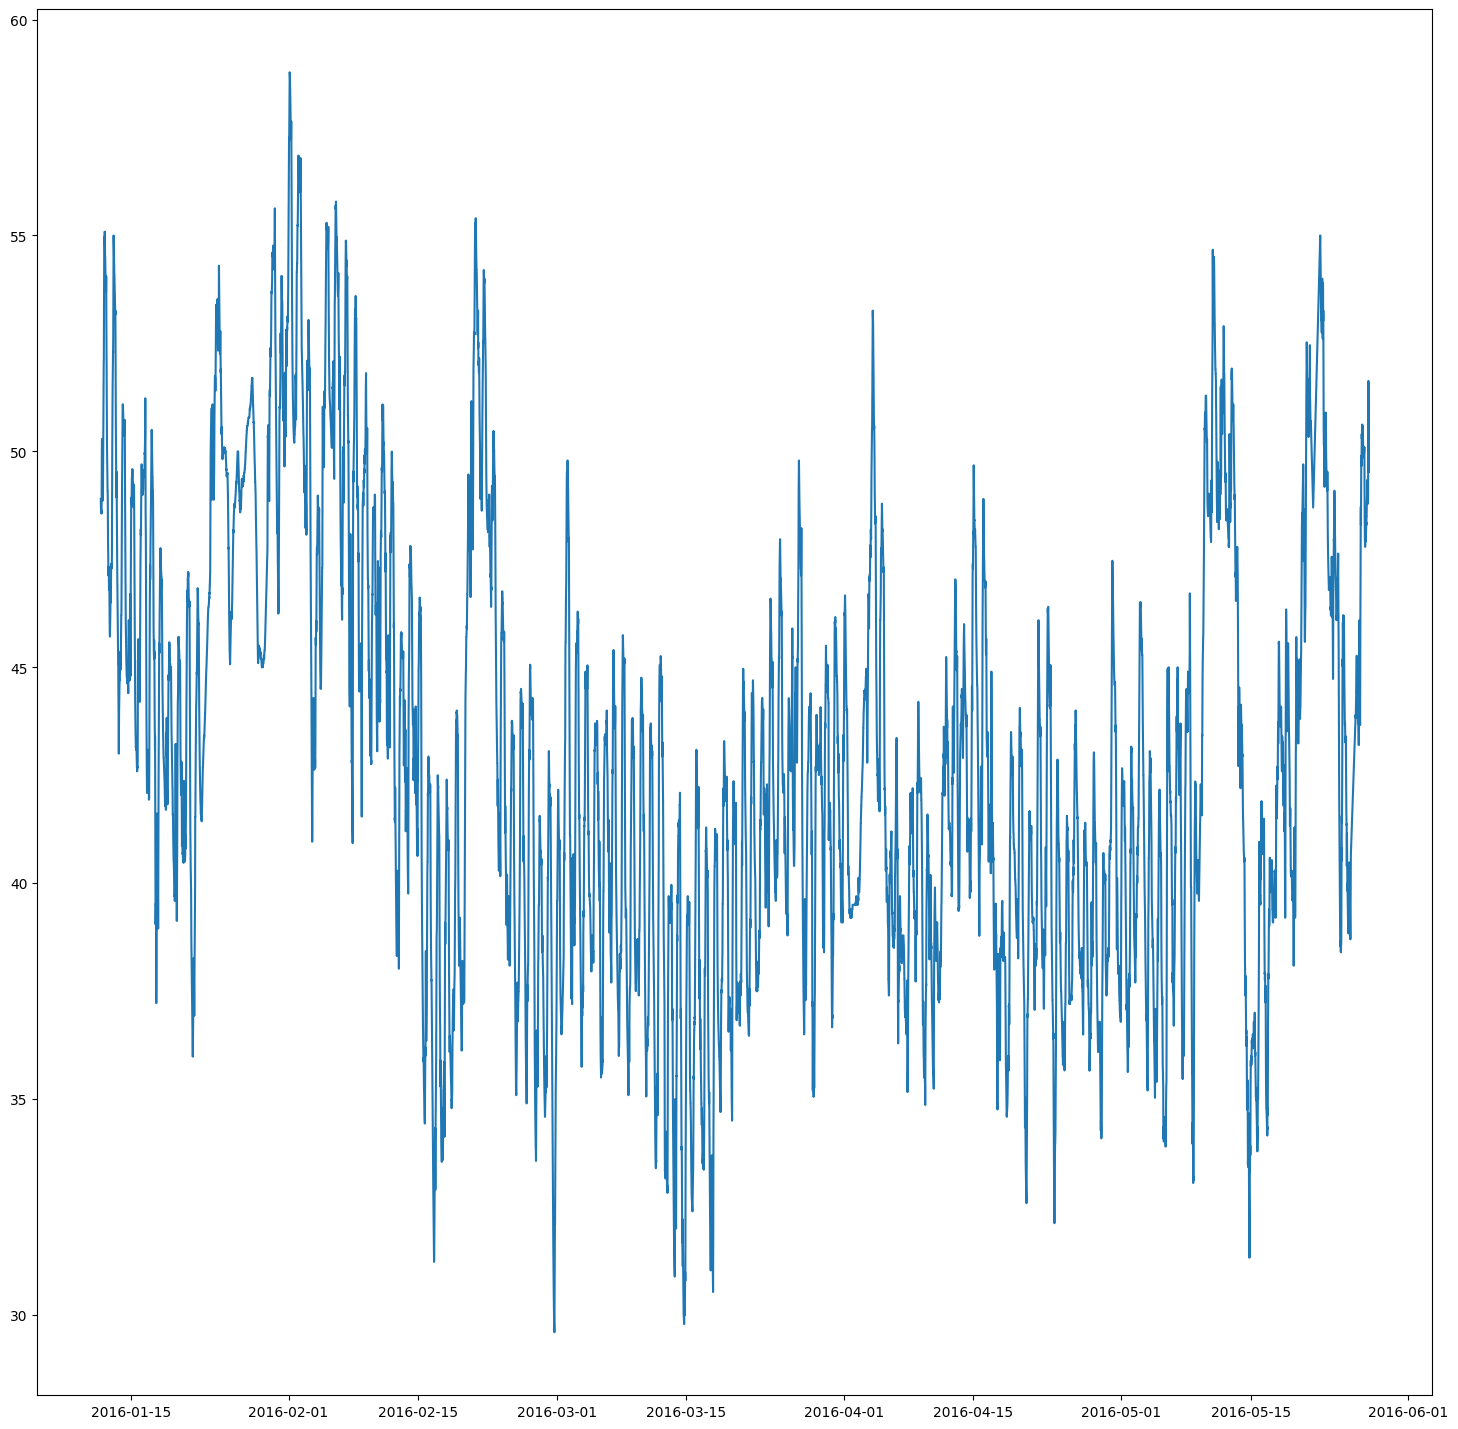

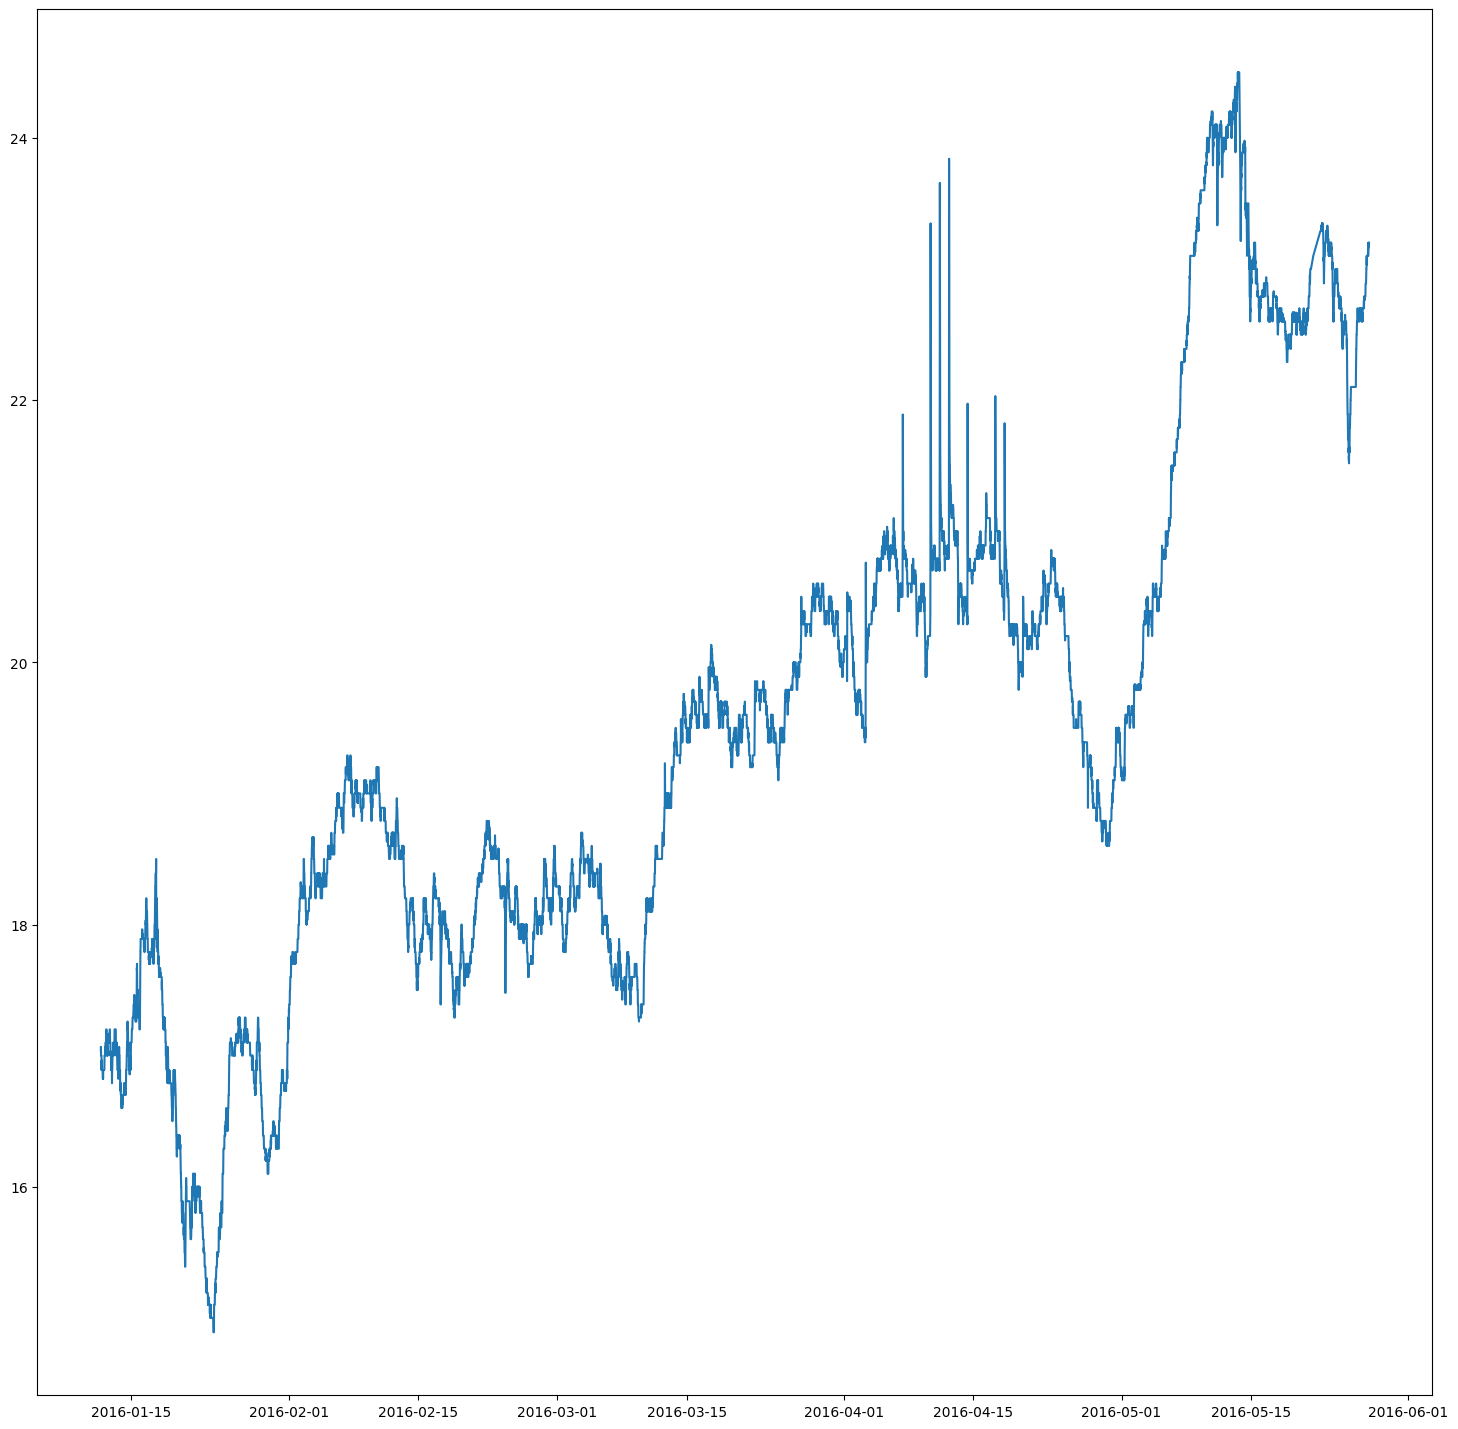

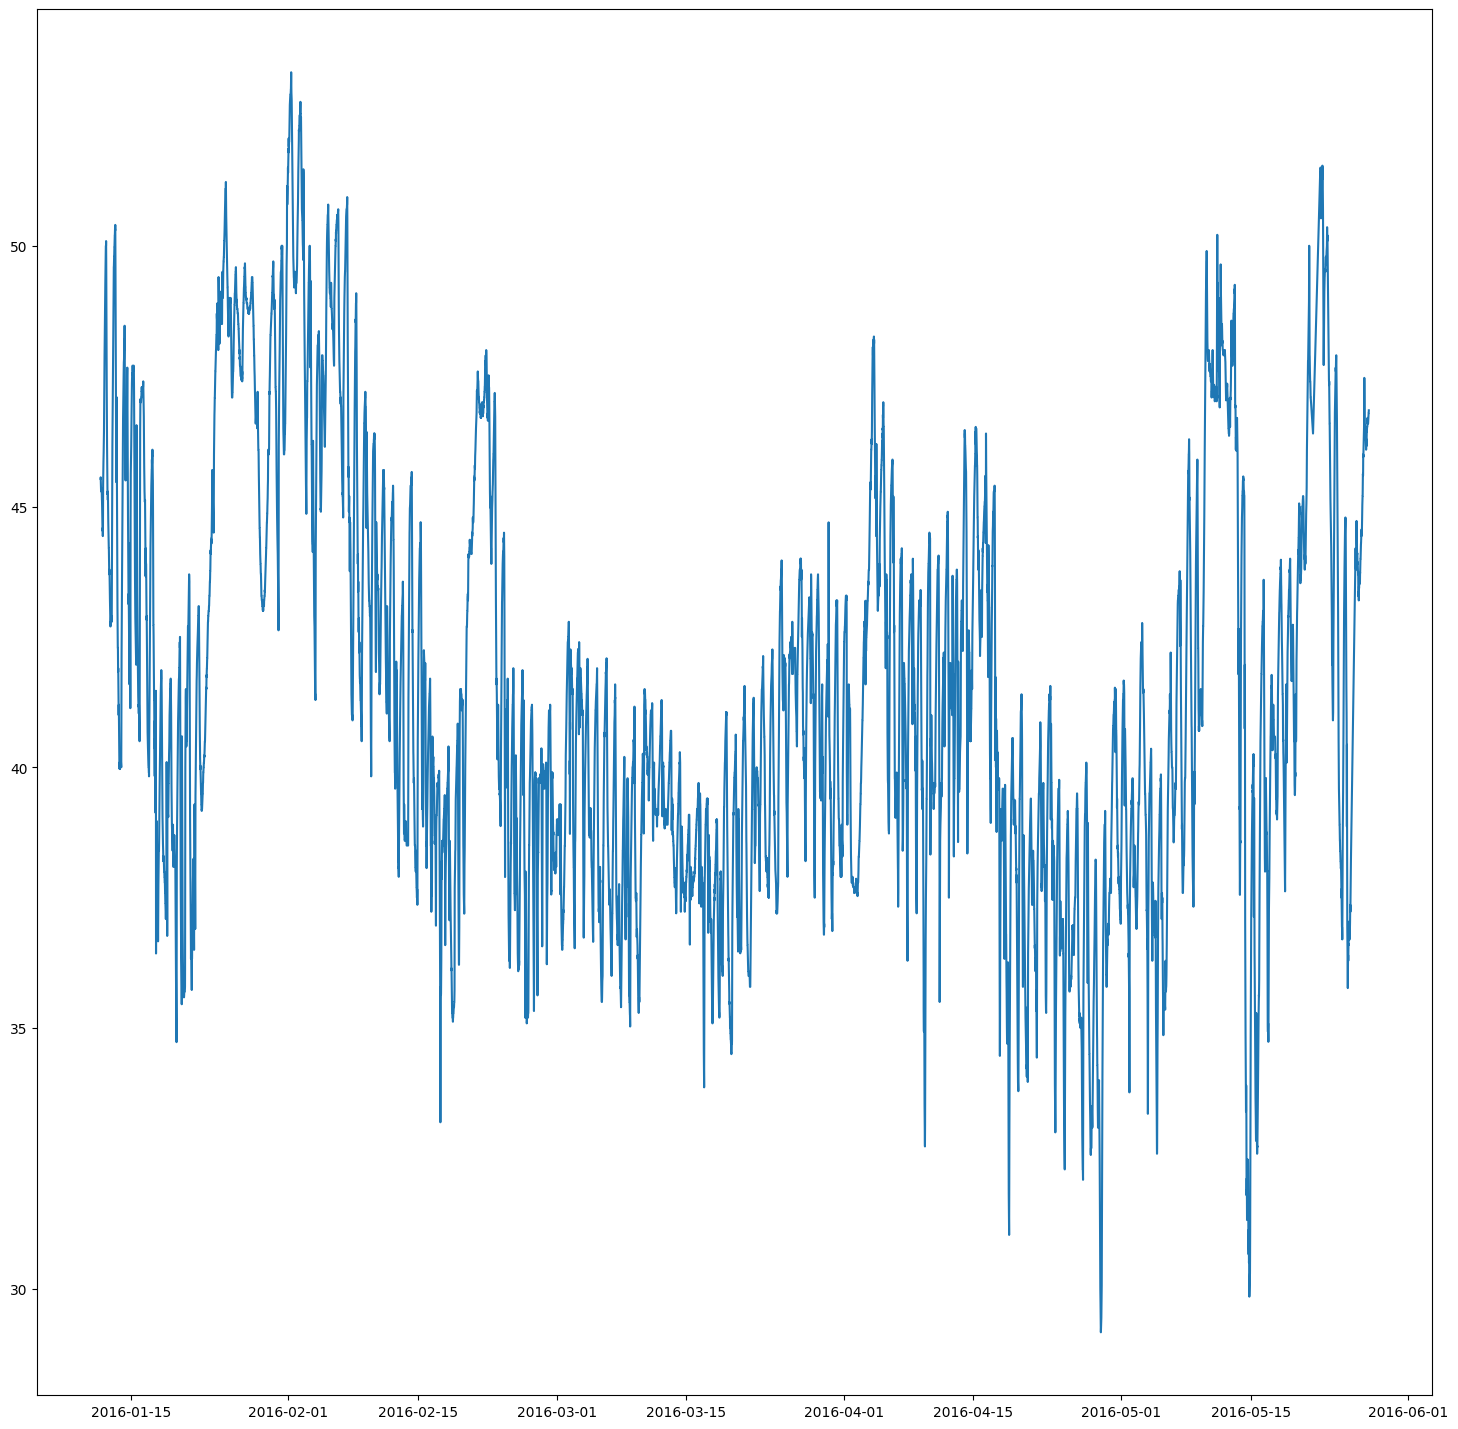

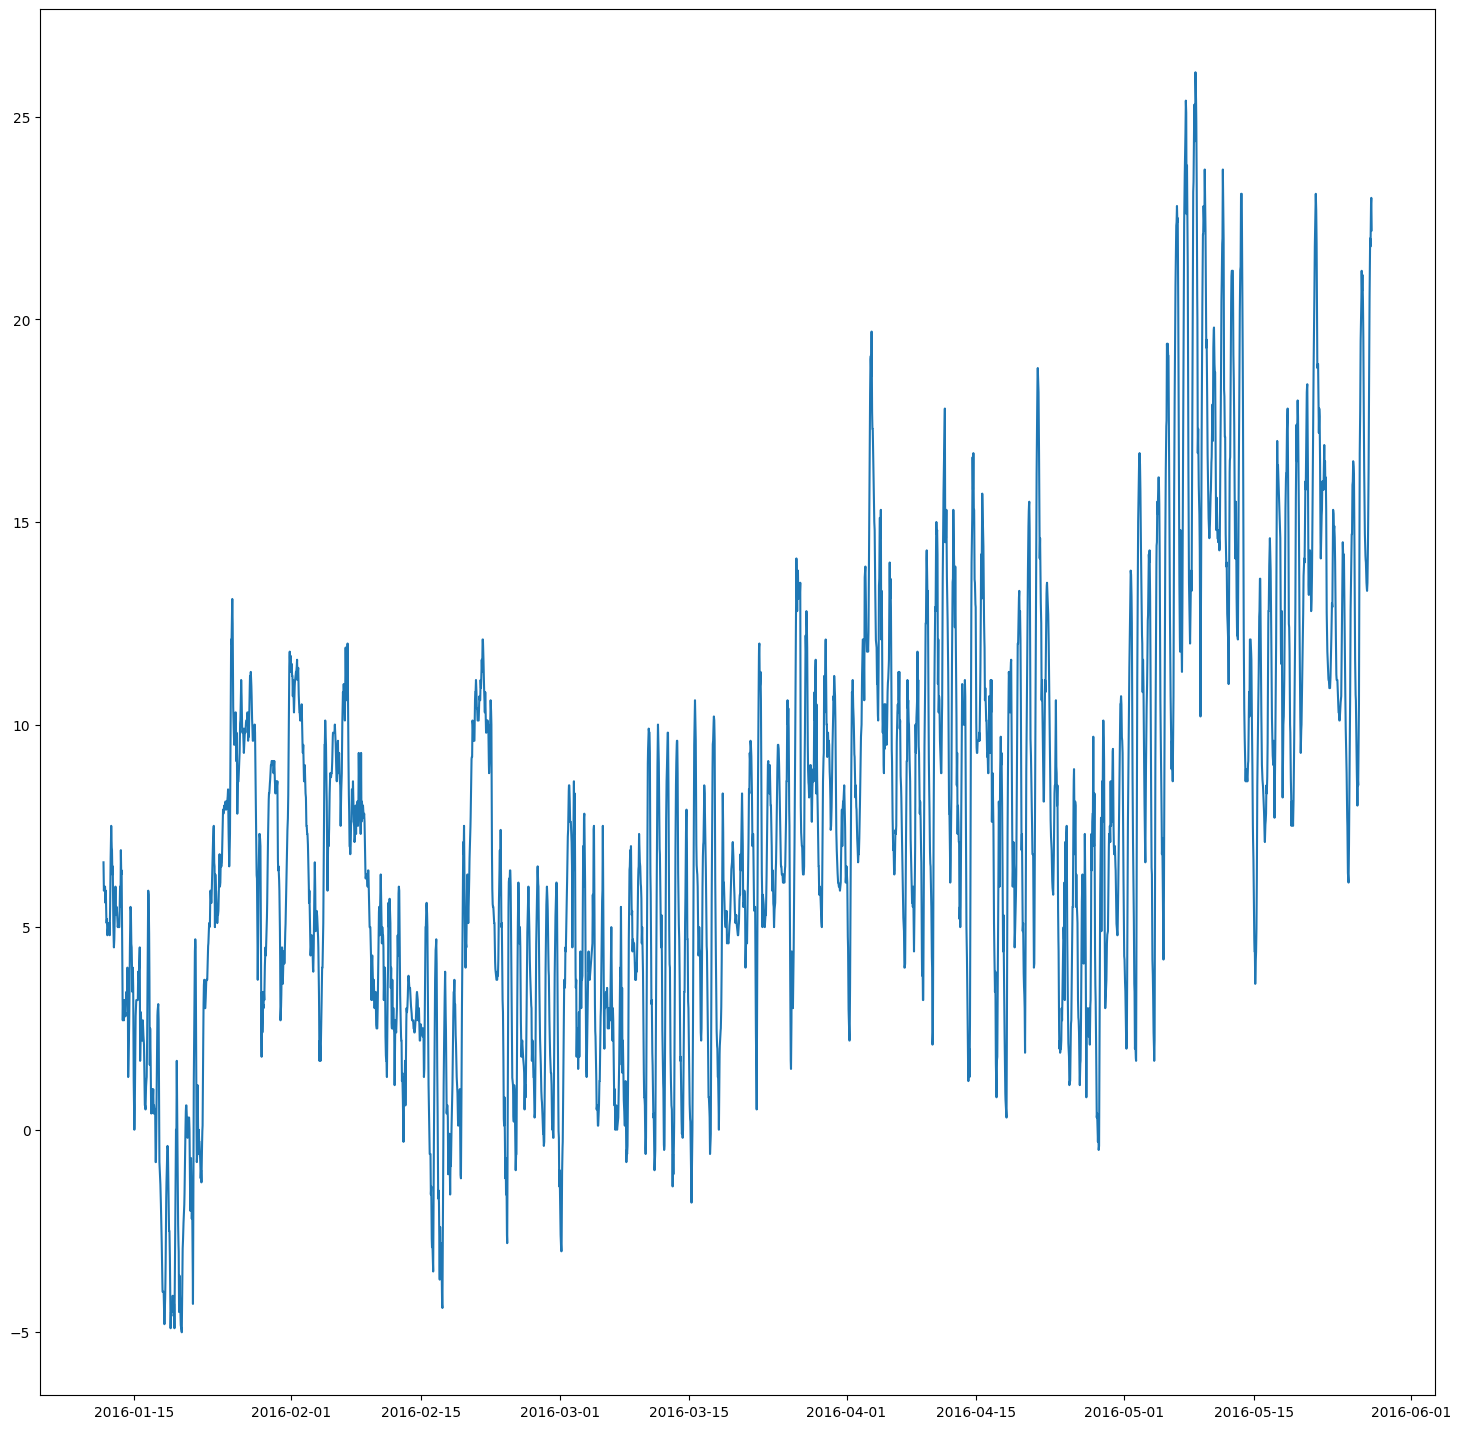

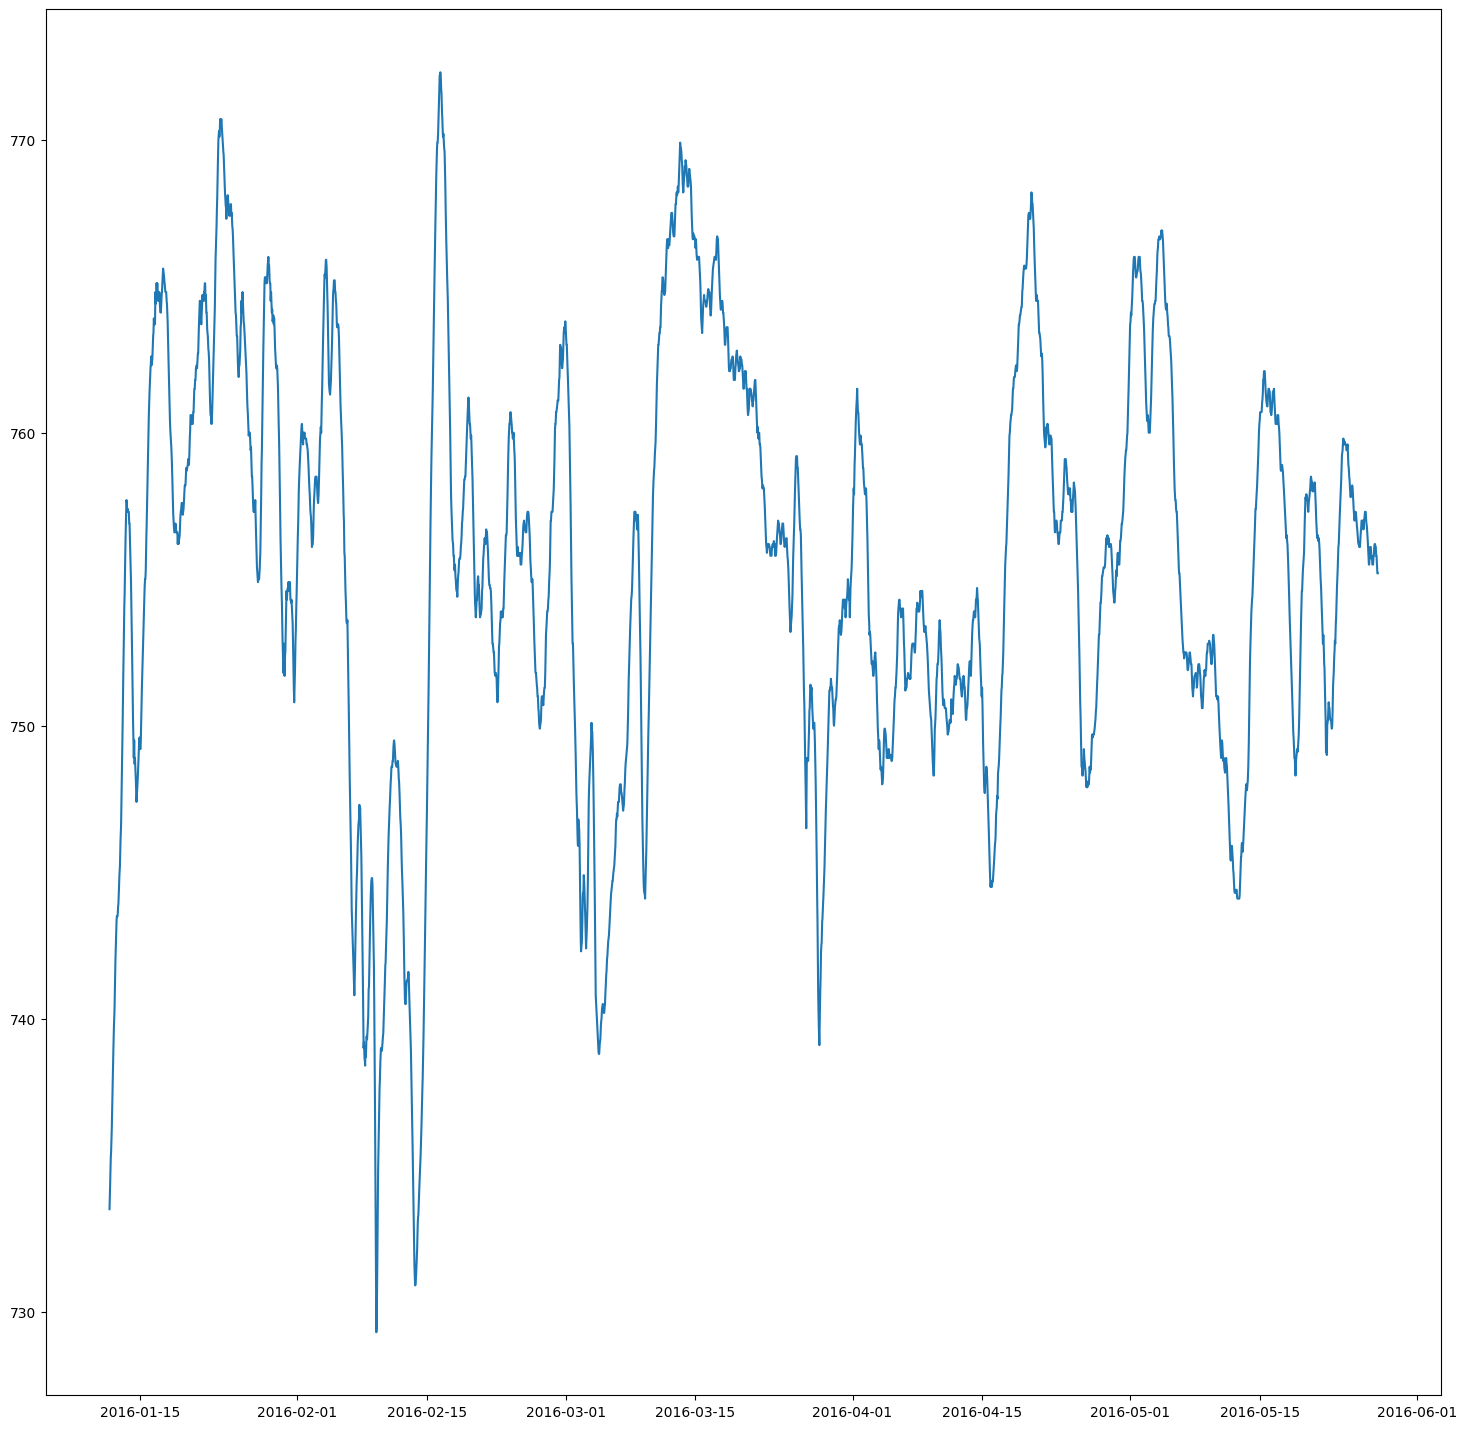

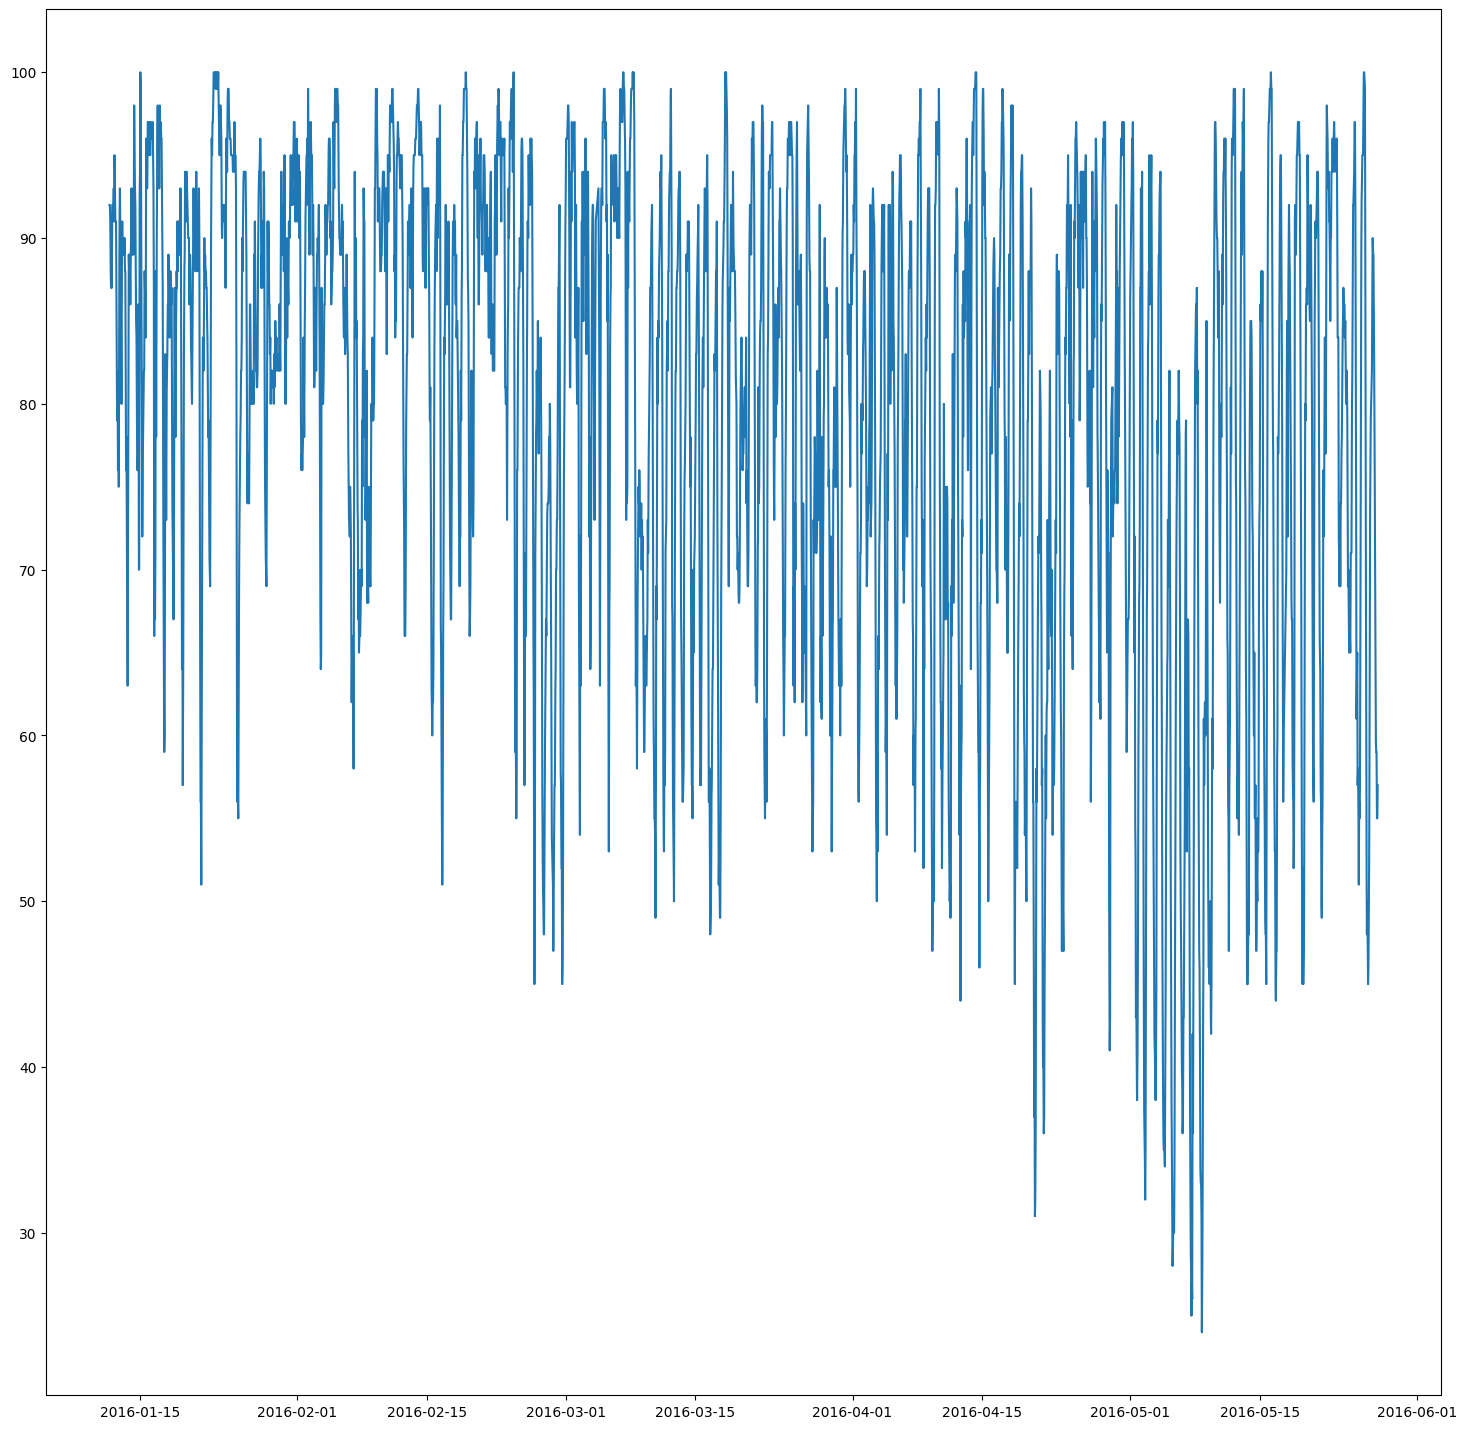

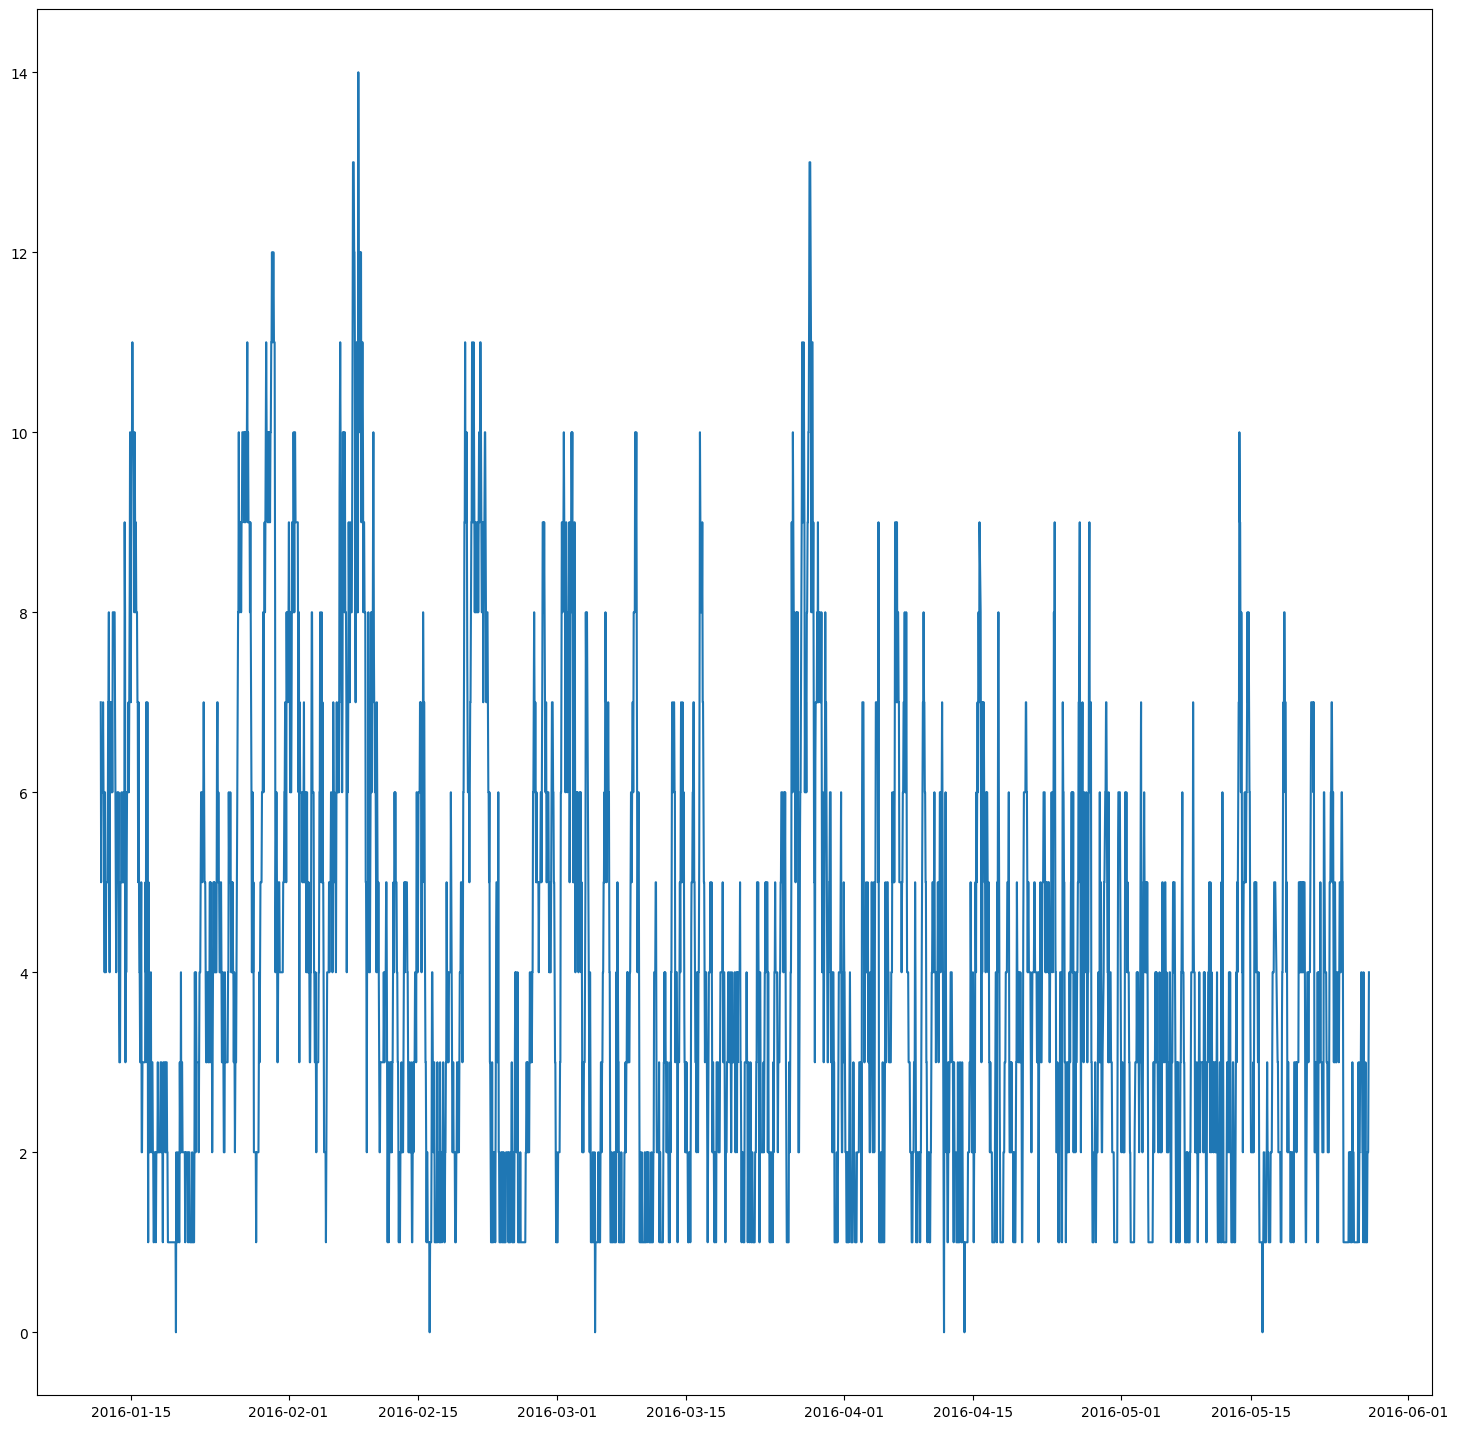

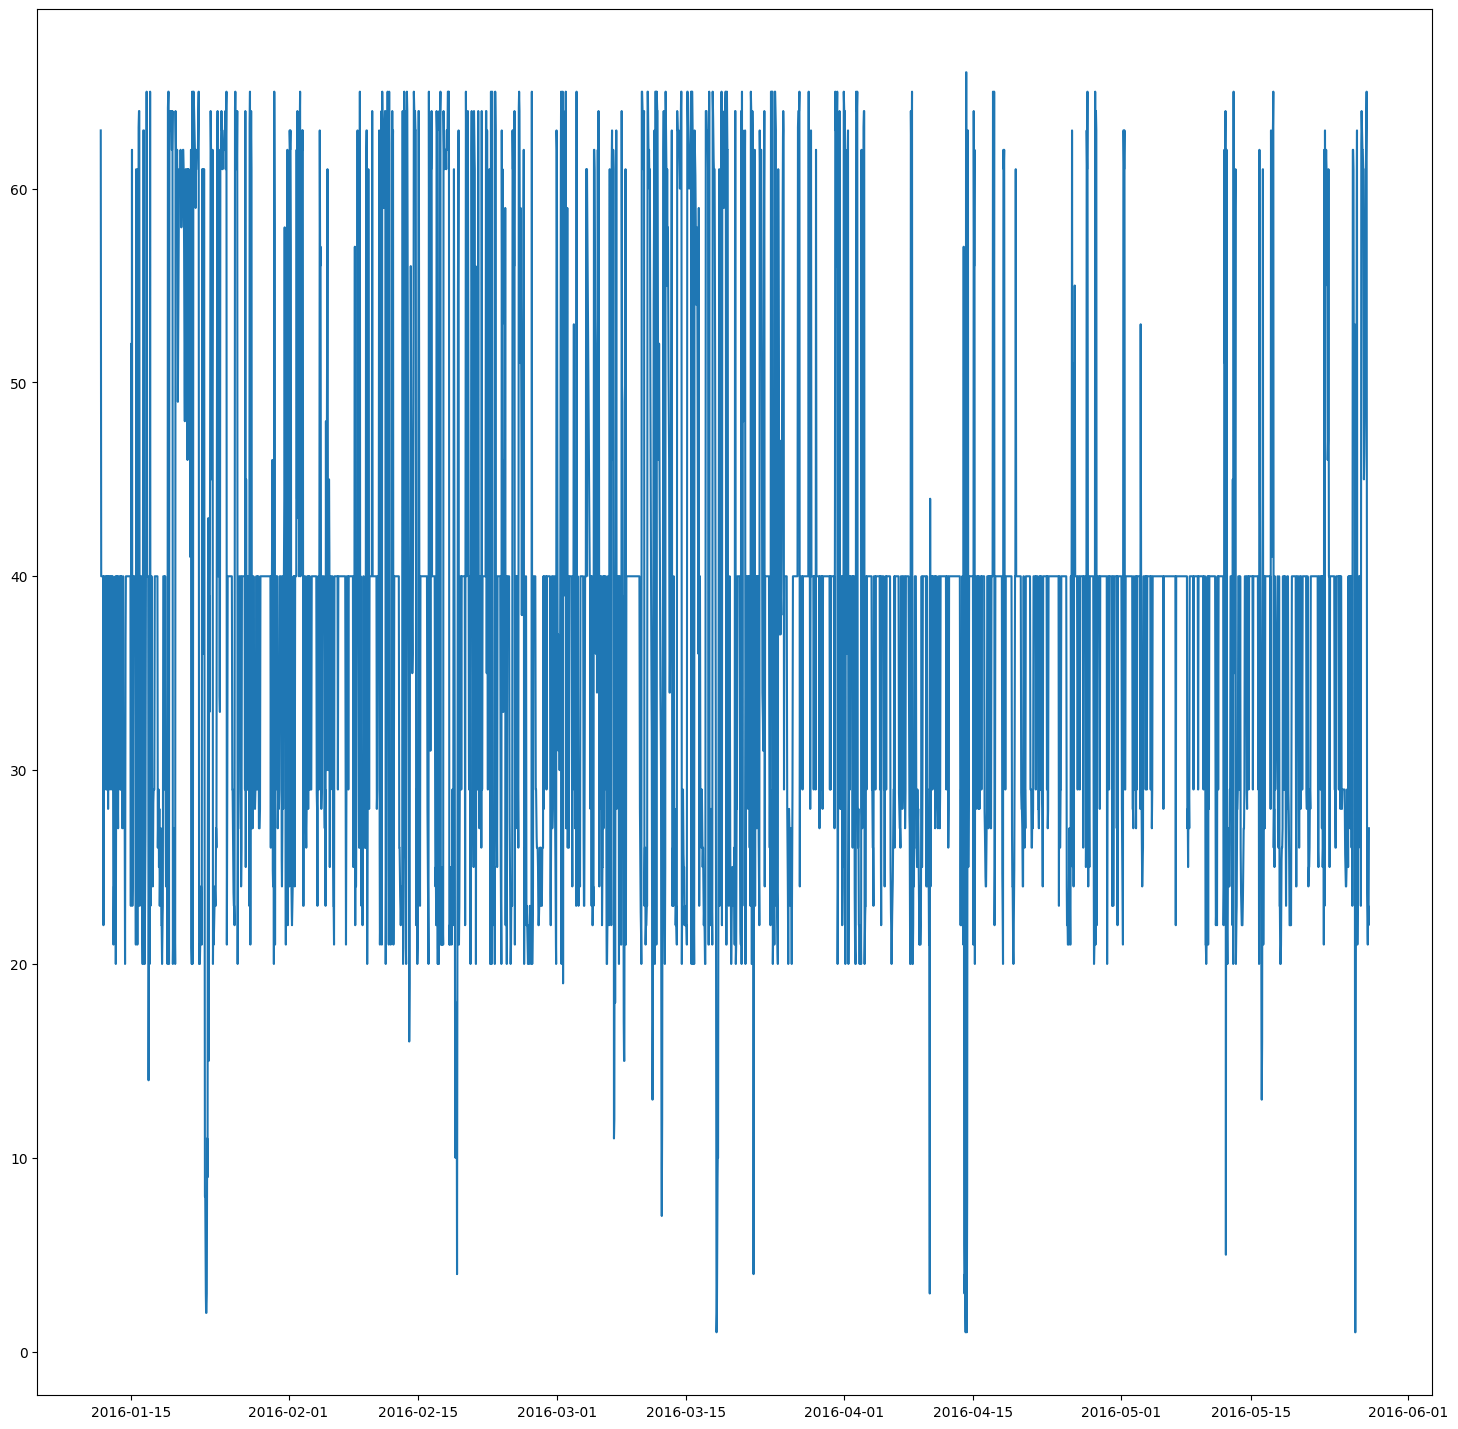

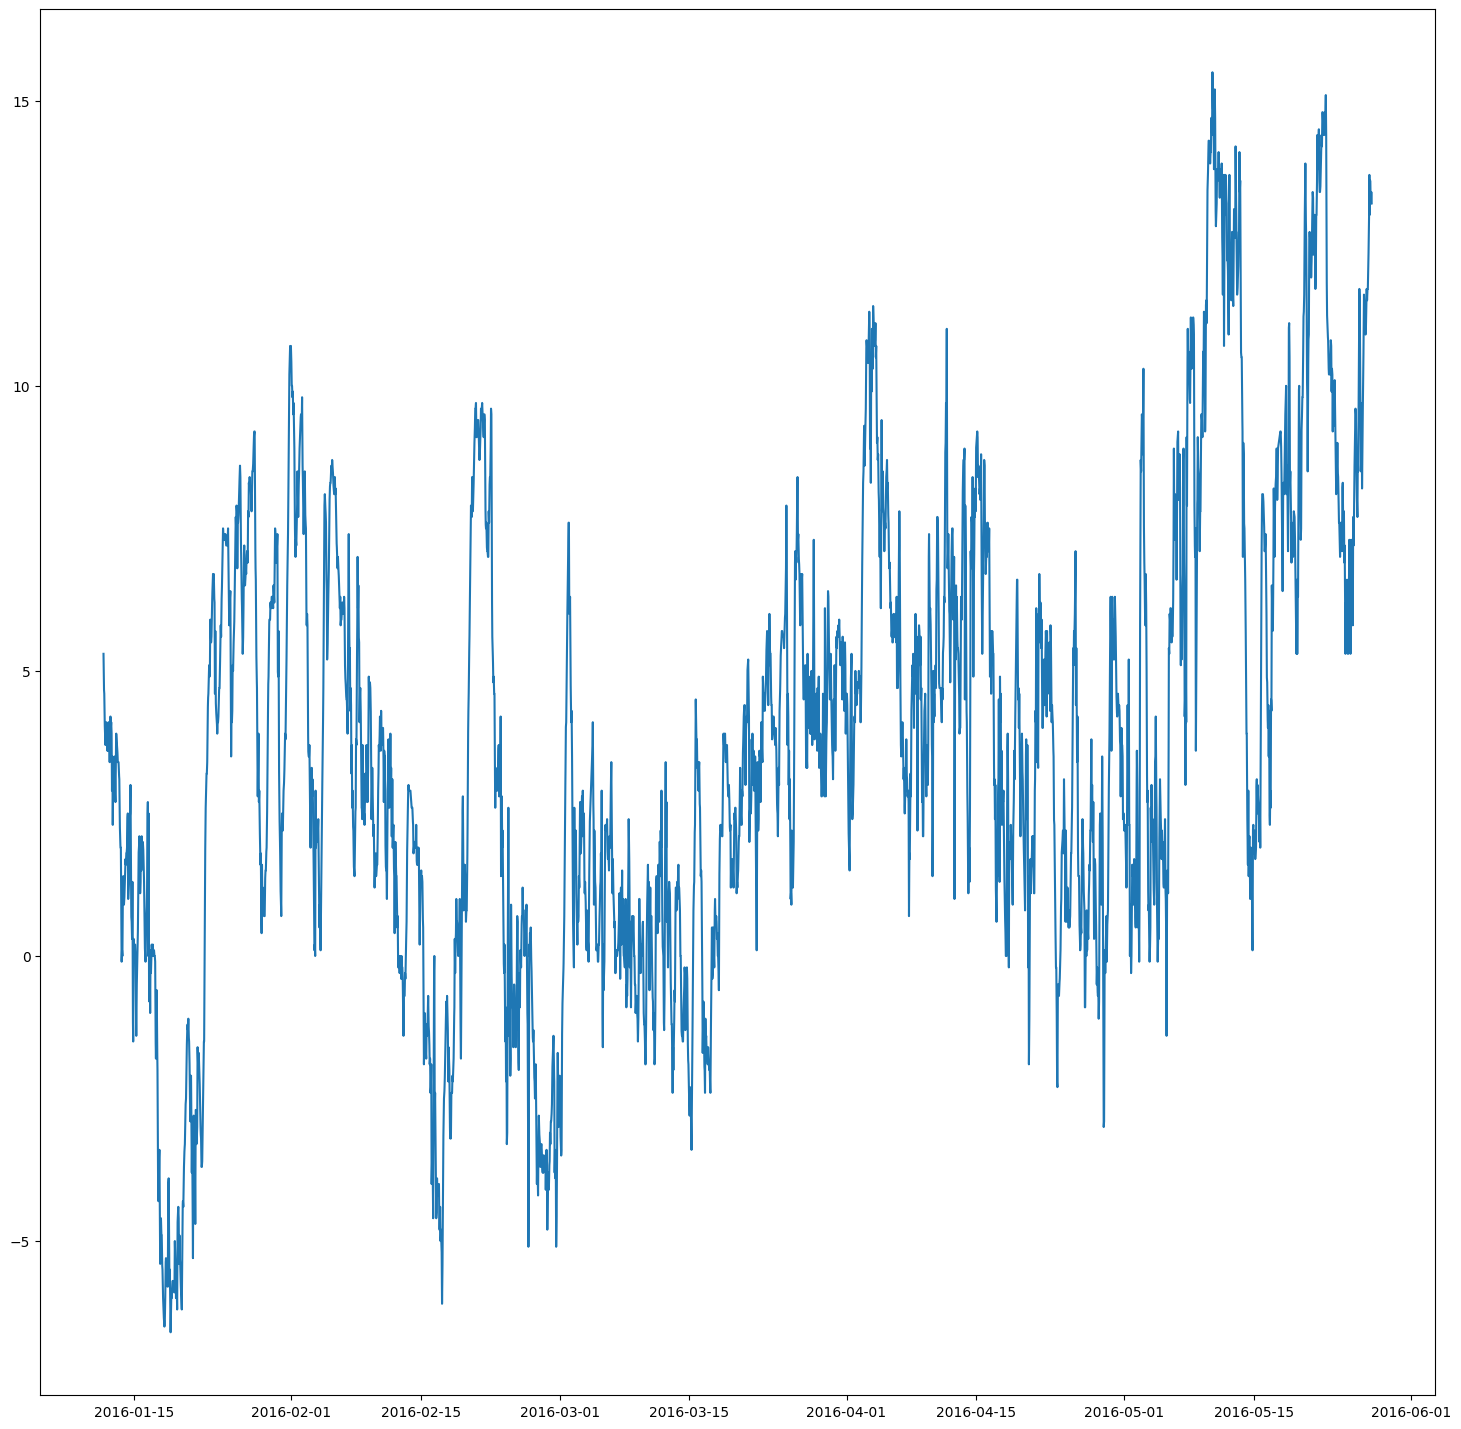

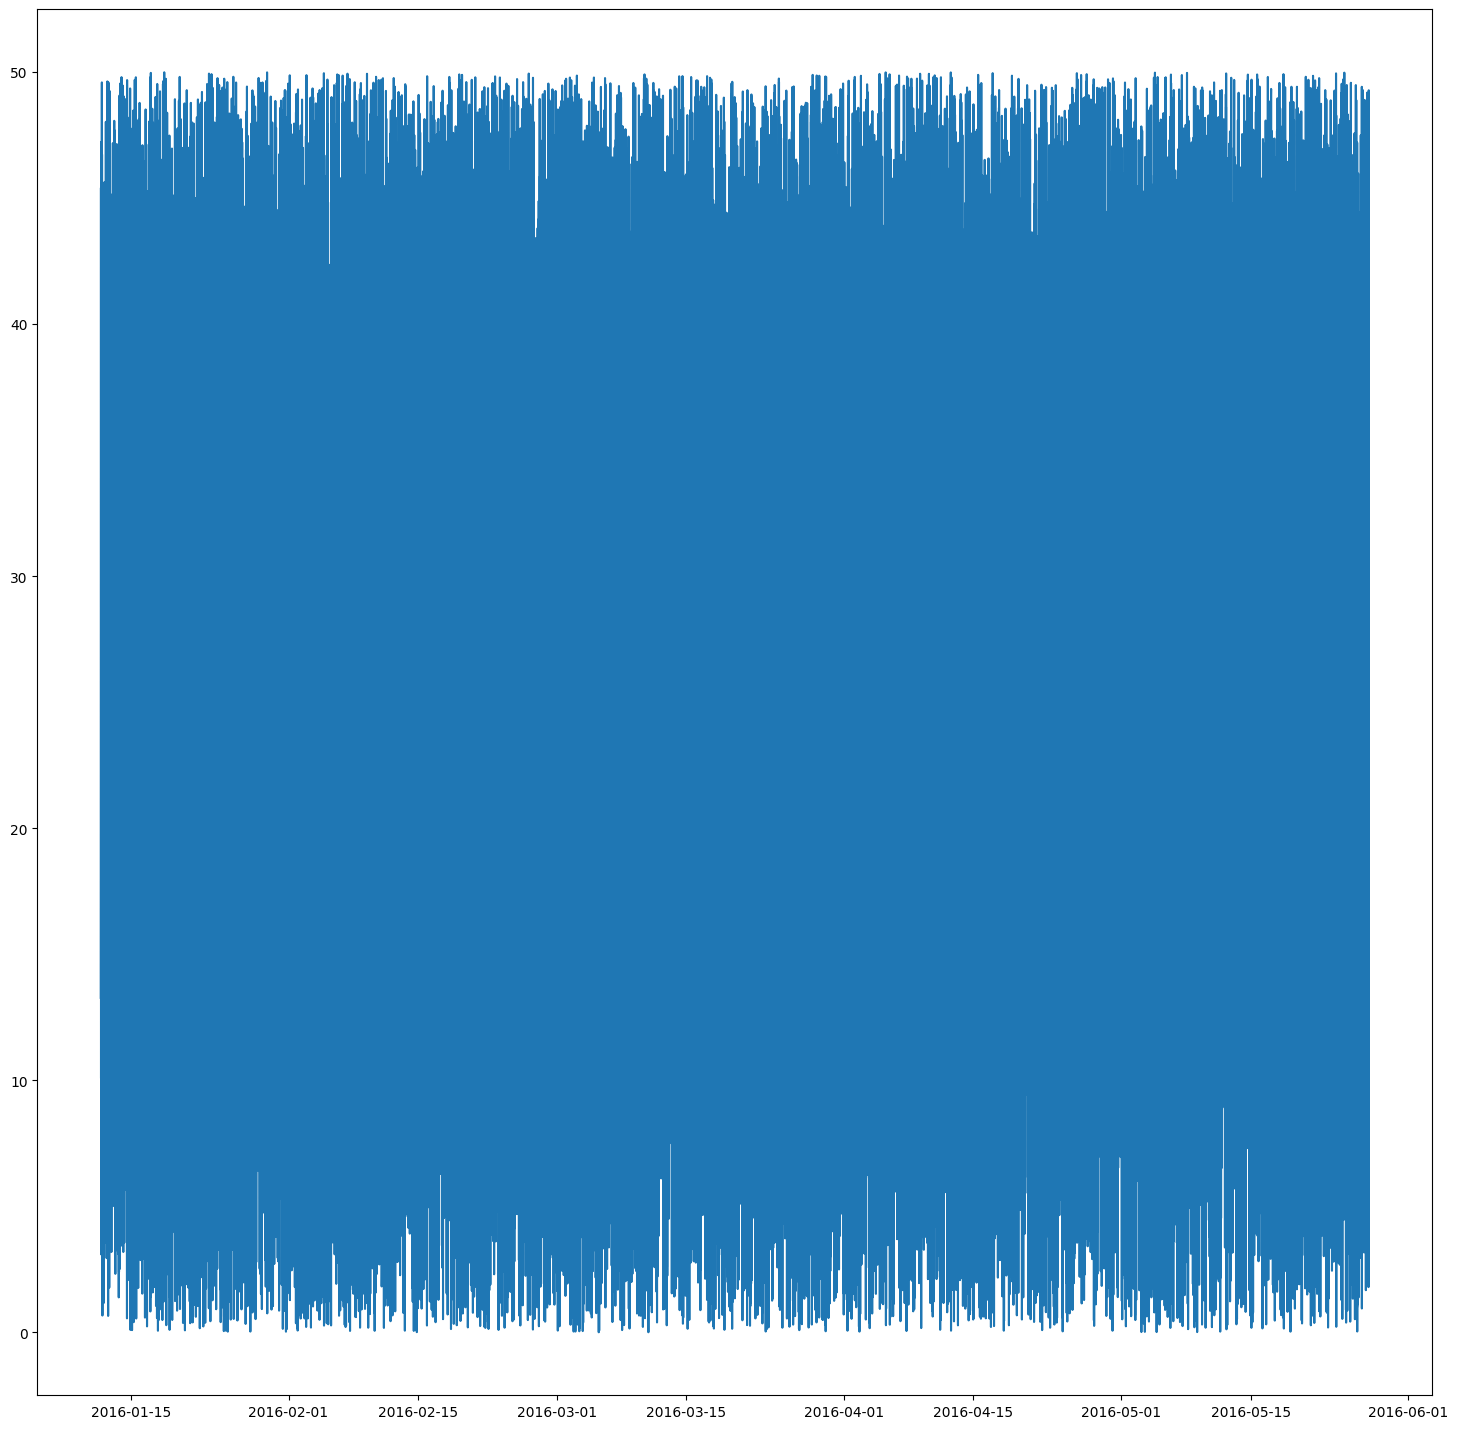

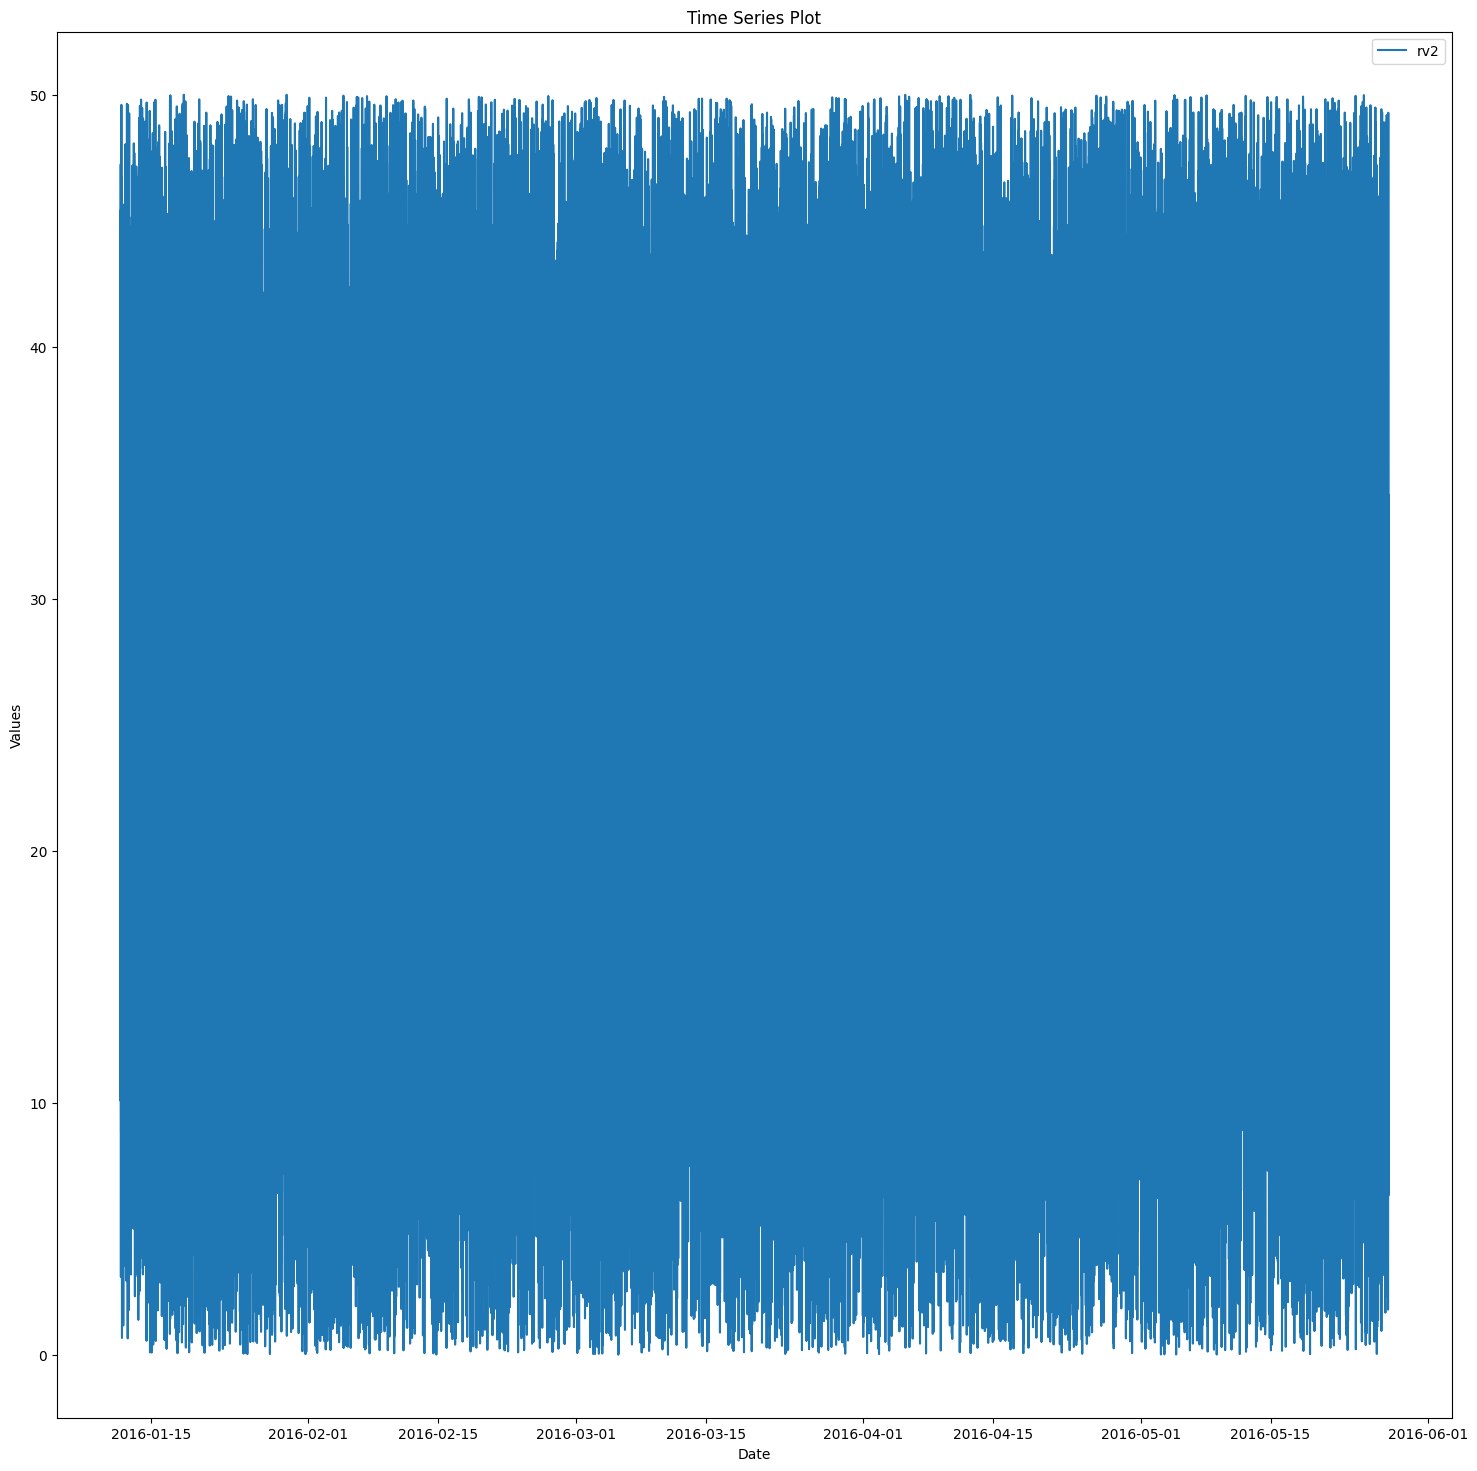

In [23]:
for column in df.columns:
    plt.figure(df.columns.get_loc(column)+1,figsize=(18, 18))
    plt.plot(df.index, df[column], label=column)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()



Analyzing column: Appliances
ADF Statistic for Appliances: -21.616378198036106
p-value for Appliances: 0.0


<Figure size 2000x1400 with 0 Axes>

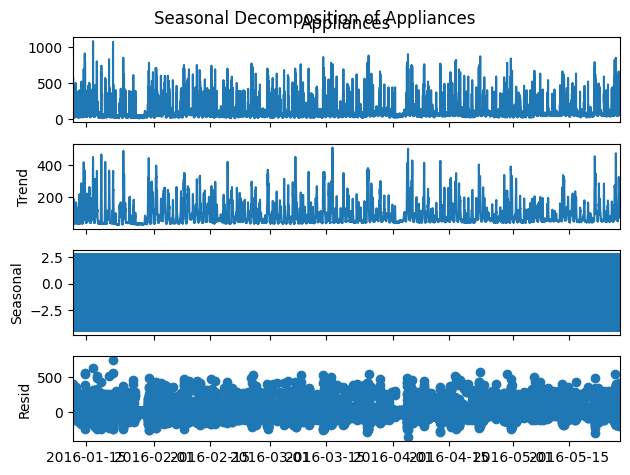


Analyzing column: lights
ADF Statistic for lights: -21.57587626575694
p-value for lights: 0.0


<Figure size 2000x1400 with 0 Axes>

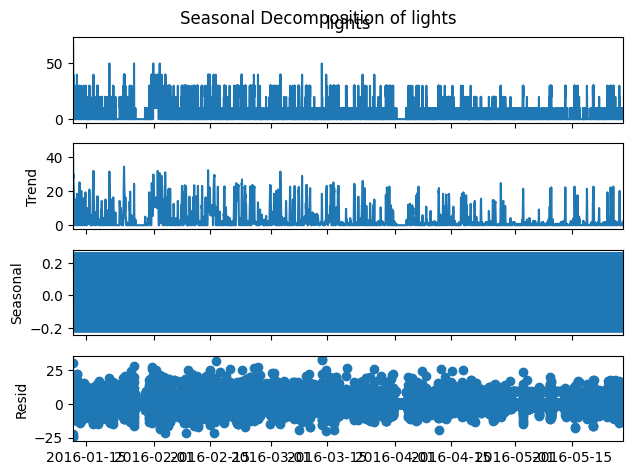


Analyzing column: T1
ADF Statistic for T1: -5.737393875047102
p-value for T1: 6.391283705411319e-07


<Figure size 2000x1400 with 0 Axes>

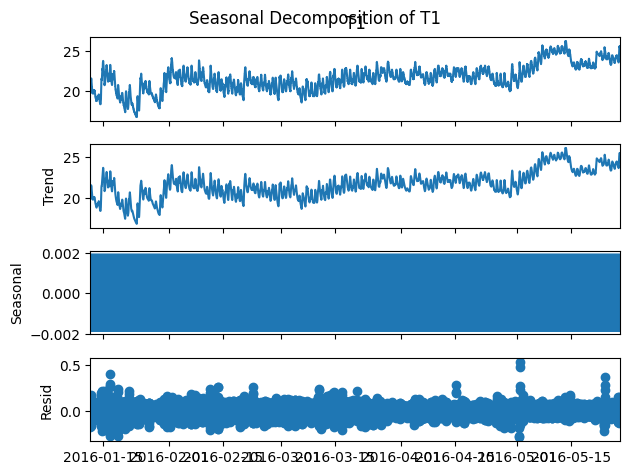


Analyzing column: RH_1
ADF Statistic for RH_1: -5.224068797128924
p-value for RH_1: 7.849940768687995e-06


<Figure size 2000x1400 with 0 Axes>

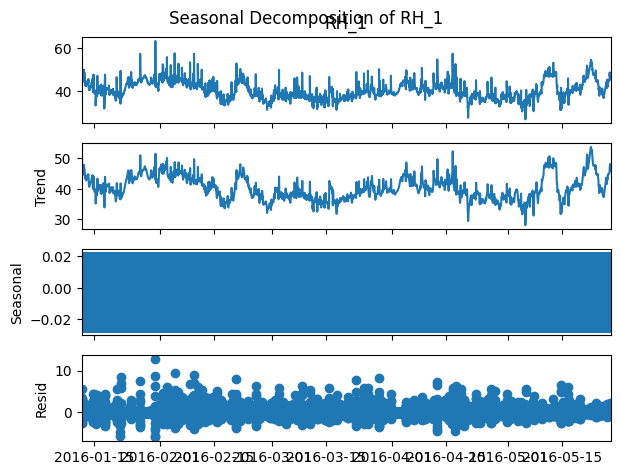


Analyzing column: T2
ADF Statistic for T2: -10.877894983112705
p-value for T2: 1.3173517690626697e-19


<Figure size 2000x1400 with 0 Axes>

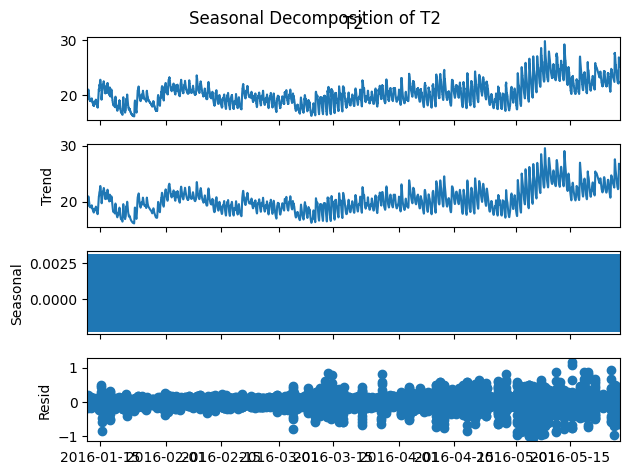


Analyzing column: RH_2
ADF Statistic for RH_2: -10.37426469577065
p-value for RH_2: 2.2226596271670244e-18


<Figure size 2000x1400 with 0 Axes>

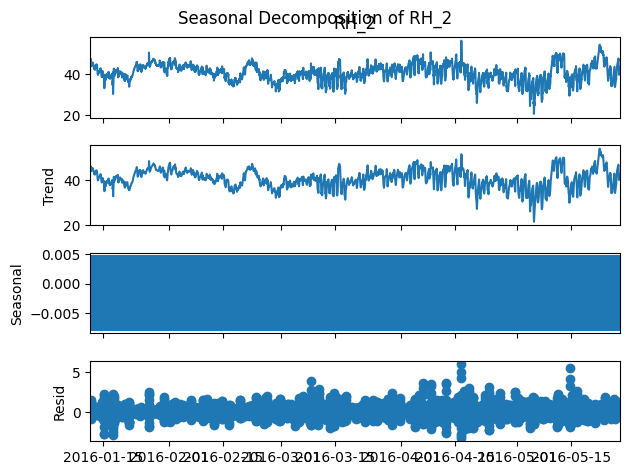


Analyzing column: T3
ADF Statistic for T3: -3.575271339595783
p-value for T3: 0.006251770281035867


<Figure size 2000x1400 with 0 Axes>

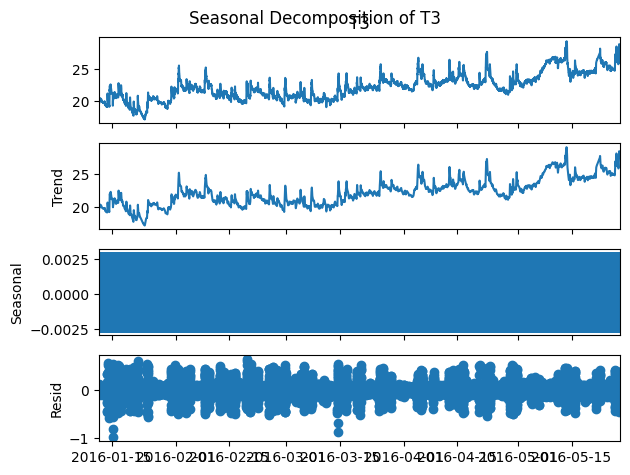


Analyzing column: RH_3
ADF Statistic for RH_3: -4.6312025207269
p-value for RH_3: 0.00011310326290716379


<Figure size 2000x1400 with 0 Axes>

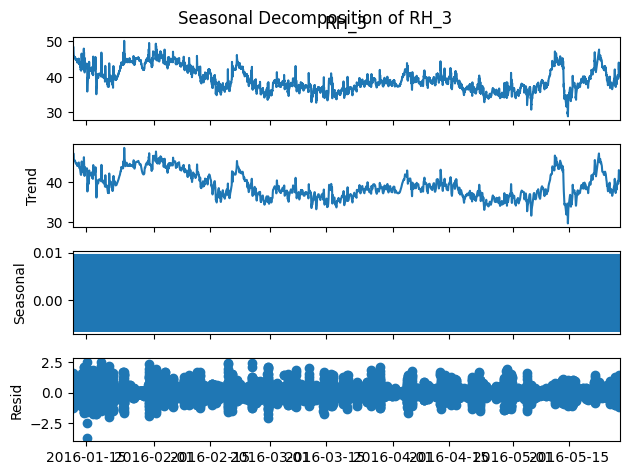


Analyzing column: T4
ADF Statistic for T4: -3.6447695238283613
p-value for T4: 0.004960606849893979


<Figure size 2000x1400 with 0 Axes>

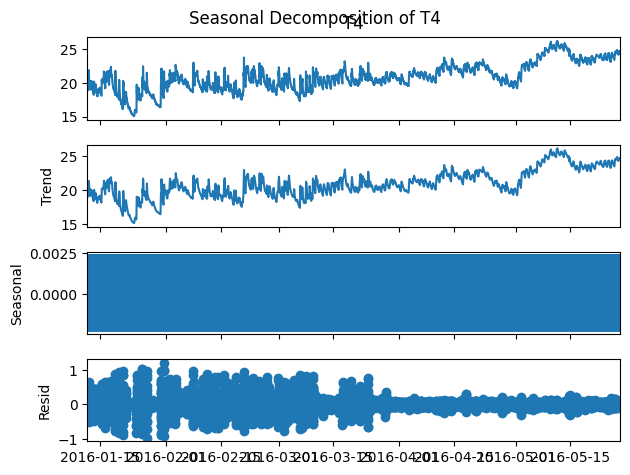


Analyzing column: RH_4
ADF Statistic for RH_4: -4.373133660194696
p-value for RH_4: 0.000331071765959463


<Figure size 2000x1400 with 0 Axes>

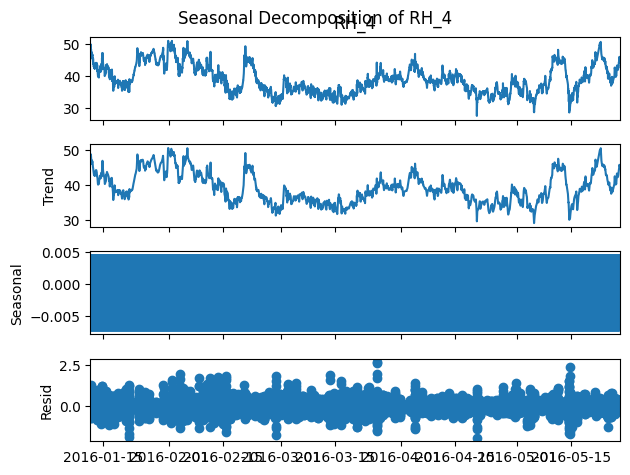


Analyzing column: T5
ADF Statistic for T5: -4.744969032234352
p-value for T5: 6.922160977469147e-05


<Figure size 2000x1400 with 0 Axes>

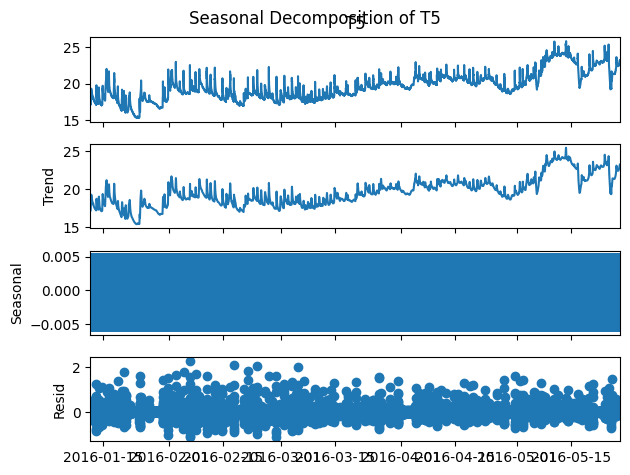


Analyzing column: RH_5
ADF Statistic for RH_5: -19.975427205278883
p-value for RH_5: 0.0


<Figure size 2000x1400 with 0 Axes>

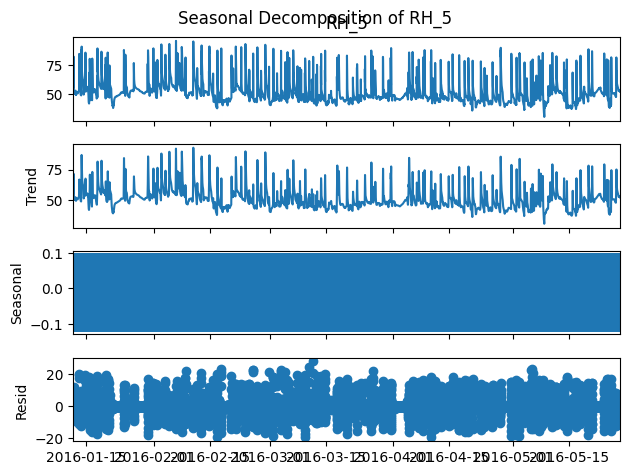


Analyzing column: T6


KeyboardInterrupt: 

<Figure size 2000x1400 with 0 Axes>

In [22]:

for column in df.columns:
    print(f"\nAnalyzing column: {column}")
    plt.figure(figsize=(20,14))
    # ADF Test
    adf_result = adfuller(df[column])
    print(f"ADF Statistic for {column}: {adf_result[0]}")
    print(f"p-value for {column}: {adf_result[1]}")

    # Seasonal Decompose
    decomposition = seasonal_decompose(df[column], model='additive', period=12)
    decomposition.plot()
    plt.suptitle(f'Seasonal Decomposition of {column}')
    plt.show()


In [ ]:
rolling_means = df.rolling(window=12).mean()

plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(rolling_means.index, rolling_means[column], label=f'{column} Rolling Mean')
plt.title('Rolling Mean (12-month window)')
plt.legend()
plt.show()


In [ ]:
df_corr = df.corr()
print("Correlation Matrix:")
print(df_corr)

sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
for column in df.columns:
    plt.figure()
    lag_plot(df[column])
    plt.title(f'Lag Plot for {column}')
    plt.show()


In [ ]:
for column in df.columns:
    print(f"Autocorrelation and Partial Autocorrelation for {column}")
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    plot_acf(df[column], ax=axes[0], lags=20, title=f'ACF: {column}')
    plot_pacf(df[column], ax=axes[1], lags=20, title=f'PACF: {column}')
    plt.show()

In [ ]:
for column in df.columns:
    print(f"Autocorrelation and Partial Autocorrelation for {column}")
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    plot_acf(df[column], ax=axes[0], lags=20, title=f'ACF: {column}')
    plot_pacf(df[column], ax=axes[1], lags=20, title=f'PACF: {column}')
    plt.show()

# Multivariate-specific feature engineering: Lagged variables

# Pairwise relationships


In [ ]:
lagged_df = pd.concat(
    [df.shift(i).add_suffix(f"_lag{i}") for i in range(1, 4)], axis=1  # Lag 1, 2, 3
)
lagged_df = pd.concat([df, lagged_df], axis=1).dropna()
print(lagged_df.head())

In [ ]:
sns.pairplot(df)
plt.show()

KeyboardInterrupt: 